# Project: Data Scientist Capstone (Regression to predict Machinery's time to next failure)
Udacity Data Scientist Nanodegree <br> Jean Carlos da Cruz

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This data set contains information
about 2,852 maintenances done on forestry machinery from
January 2020 to August 2021. The main goal is to test as much regression models as possible in order to predict the next time a machine will failure and need maintenance. Nowadays this kind of failure it is not predicted anyway and causes productivity loss since the machine fails unexpectedly.

So in order to achieve this result we will do a Data Wrangling to check and fix problems in data, like duplicates, naming translations, fix nulls, creating new relevant fields. After that we will do a Exploratory Data Analysis in the dataset to better understand the data and shape it in order to use it in the upcoming model testing. After the EDA we will do the Modeling part where with the help of PyCaret module we will test several regression models in order to check if regression can be used to predict next time a machine will failure. In the end of the notebook there is conclusions, recommendations and references.

> **The following questions will help to better understand and format the dataset in order to be used to model the time to failure:** <br>
<ul>
<li><a href="#top10_machinery"> 1- Which machinery and operation had the most maintenance records?</a></li>
<li><a href="#most_maintenance_month">2- What is the mean time to repair in hours in every month?</a></li>
<li><a href="#mean_time_maint">3- What is the mean time between maintenances per machine and operation group?</a></li>
<li><a href="#share_type_maintenance">4- From the total records how many were Corrective and Preventive per month?</a></li>
<li><a href="#main_parts">5- What are the main parts used in maintenances?</a></li>
<li><a href="#operational_season">6- Which operational season had the most maintenance records?</a></li>
<li><a href="#time_to_failure">7- What is the mean time to failure per machine and operation group?</a></li>
<li><a href="#time_to_failure">8- What is the mean age per operation group?</a></li>

In [ ]:
  # Import all the packages needed for analysis
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# to Print our visualizations
%matplotlib inline
pd.set_option('display.max_rows', None)


<a id='wrangling'></a>
## Data Wrangling


>After loading the dataset, I checked for cleanliness, and then trim and clean the dataset to answer the goal questions.

### General Properties

In [ ]:
#loading the csv file and storing it in the variable "df_movies"
df_maintenance = pd.read_excel('dadosv2.xlsx')

#getting first five rows of the dataset
df_maintenance.head()

,CODOSMANUT,DATAHORAINI,DATAHORAFIM,DESCTIPOPECA,DESCSUBSISTEMA,DESCRICAOLOCAL,NOMEGRUPO,DESCTIPOMANUT,NOMESERVICO,OBSERVACAO,QTDEPECA,SIGLAMAQUINA,MARCADOR,MECANICO,DATACOMPRA,ANOFABRICACAO,IDADE
0,81054,2020-08-26 13:00:00,2020-08-26 14:20:00,Oleos e Lubrificantes,NaN,NaN,NaN,Preventiva,OLEO 15W40,Troca de óleo do motor,27.0,HV 05,2726,Matheus,2008-01-28,2008.0,150
1,82957,2021-07-19 13:00:00,2021-07-19 13:30:00,Oleos e Lubrificantes,NaN,NaN,NaN,Corretiva,OLEO 10W30,COMPLETAR OLEO HIDRAULICO E OLEO DO MOTOR,20.0,TAC 32,1507,Marcio,2019-12-09,2019.0,19
2,82909,2021-09-15 16:30:00,2021-09-15 17:59:00,Peças Valtra,NaN,NaN,NaN,Corretiva,Silencioso valtra,Tempo de uso trica de silencioso furado,1.0,TAC 13,18155,Matheus,2012-07-12,2012.0,110
3,82825,2021-07-25 10:00:00,2021-07-25 13:00:00,Peças Valtra,NaN,NaN,NaN,Corretiva,Barra seletora diversas,Troca da bara celedora e olhal da marcha,1.0,TAC 11,2506,Matheus,2006-10-09,NaN,177
4,79802,2020-03-12 11:00:00,2020-03-12 12:15:00,Peças Valtra,NaN,Santa Maria do Jauru,NaN,Corretiva,ARRUELA DIVERSOS VALTRA,Quebrado por batidas em toco,12.0,TT 92,1610,Matheus,2017-09-04,2016.0,30


In [ ]:
#Changing the name of the fields to english
df_maintenance.rename(columns={"CODOSMANUT": "MAINTENANCE_ID", #The unique code to identify each maintenance
                               "DATAHORAINI": "START_TIME", #Starting time of the maintenance
                               "DATAHORAFIM": "END_TIME", #Ending time of the maintenance
                               "DESCTIPOPECA": "PART_TYPE", #The type of part that was used to repair the machinery
                               "DESCSUBSISTEMA": "SUB_SYSTEM", #The Sub system group used in the repairing
                               "DESCRICAOLOCAL": "MAINTENANCE_LOCAL", #The Local where the maintenance happened
                               "NOMEGRUPO": "GROUP_NAME", #The maintenance group name
                               "DESCTIPOMANUT": "MAINTENANCE_TYPE", #The type of maintenance performed
                               "NOMESERVICO": "SERVICE_NAME", #The service name that was performed during maintenance
                               "OBSERVACAO": "OBSERVATION", #Any obersation the machine operator or the mechanic made about the maintenance 
                               "QTDEPECA": "PART_NUMBER", #Total number of parts used to repair the machinery
                               "SIGLAMAQUINA": "MACHINERY_ID", #The unique code to identify each machinery
                               "MARCADOR": "MACHINERY_HOURMETER", #The hour meter of the machinery when the maintenance started
                               "MECANICO": "MECHANIC", #The name of the mechanic responsible for the maintenance
                               "DATACOMPRA": "PURCHASE_DATE", #Date where the machine was bought
                               "ANOFABRICACAO": "BUILT_YEAR", #Year where the machine was built
                               "IDADE": "AGE" #Age of the machines in months when the maintenance happened
                               }, inplace = True) 
 #Checking the df renamed                                  
df_maintenance.head()

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,GROUP_NAME,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,MECHANIC,PURCHASE_DATE,BUILT_YEAR,AGE
0,81054,2020-08-26 13:00:00,2020-08-26 14:20:00,Oleos e Lubrificantes,NaN,NaN,NaN,Preventiva,OLEO 15W40,Troca de óleo do motor,27.0,HV 05,2726,Matheus,2008-01-28,2008.0,150
1,82957,2021-07-19 13:00:00,2021-07-19 13:30:00,Oleos e Lubrificantes,NaN,NaN,NaN,Corretiva,OLEO 10W30,COMPLETAR OLEO HIDRAULICO E OLEO DO MOTOR,20.0,TAC 32,1507,Marcio,2019-12-09,2019.0,19
2,82909,2021-09-15 16:30:00,2021-09-15 17:59:00,Peças Valtra,NaN,NaN,NaN,Corretiva,Silencioso valtra,Tempo de uso trica de silencioso furado,1.0,TAC 13,18155,Matheus,2012-07-12,2012.0,110
3,82825,2021-07-25 10:00:00,2021-07-25 13:00:00,Peças Valtra,NaN,NaN,NaN,Corretiva,Barra seletora diversas,Troca da bara celedora e olhal da marcha,1.0,TAC 11,2506,Matheus,2006-10-09,NaN,177
4,79802,2020-03-12 11:00:00,2020-03-12 12:15:00,Peças Valtra,NaN,Santa Maria do Jauru,NaN,Corretiva,ARRUELA DIVERSOS VALTRA,Quebrado por batidas em toco,12.0,TT 92,1610,Matheus,2017-09-04,2016.0,30


In [ ]:
#Creating the "OPERATION" field to describe what kind of operation each group of machinery performs in field
conditions = [
              (df_maintenance['MACHINERY_ID'].str.contains('CF')),
              (df_maintenance['MACHINERY_ID'].str.contains('TAC')),
              (df_maintenance['MACHINERY_ID'].str.contains('HV') | df_maintenance['MACHINERY_ID'].str.contains('TFB')),
              (df_maintenance['MACHINERY_ID'].str.contains('TT'))]
choices = ['Carga' , 'Baldeio' , 'Corte' , 'Arraste']
df_maintenance['OPERATION'] = np.select(conditions,choices, default='Outros')

In [ ]:
#Checking the dimensions of the dataframe
df_maintenance.shape

(2852, 18)

In [ ]:
# Checking the datatypes of the columns
df_maintenance.dtypes

MAINTENANCE_ID                  int64
START_TIME             datetime64[ns]
END_TIME               datetime64[ns]
PART_TYPE                      object
SUB_SYSTEM                     object
MAINTENANCE_LOCAL              object
GROUP_NAME                     object
MAINTENANCE_TYPE               object
SERVICE_NAME                   object
OBSERVATION                    object
PART_NUMBER                   float64
MACHINERY_ID                   object
MACHINERY_HOURMETER             int64
MECHANIC                       object
PURCHASE_DATE          datetime64[ns]
BUILT_YEAR                    float64
AGE                            object
OPERATION                      object
dtype: object

In [ ]:
#Checking the number of unique values in each column
df_maintenance.nunique()

MAINTENANCE_ID         1617
START_TIME             1472
END_TIME               1539
PART_TYPE                18
SUB_SYSTEM               23
MAINTENANCE_LOCAL         9
GROUP_NAME                4
MAINTENANCE_TYPE          3
SERVICE_NAME            226
OBSERVATION            1276
PART_NUMBER             100
MACHINERY_ID             71
MACHINERY_HOURMETER    1330
MECHANIC                 11
PURCHASE_DATE            43
BUILT_YEAR               14
AGE                     142
OPERATION                 5
dtype: int64

In [ ]:
#Checking for nulls in the dataset
df_maintenance.isnull().sum()

MAINTENANCE_ID            0
START_TIME                0
END_TIME                 10
PART_TYPE               207
SUB_SYSTEM             2824
MAINTENANCE_LOCAL      1849
GROUP_NAME             2552
MAINTENANCE_TYPE          0
SERVICE_NAME            207
OBSERVATION              34
PART_NUMBER             185
MACHINERY_ID              0
MACHINERY_HOURMETER       0
MECHANIC                105
PURCHASE_DATE            12
BUILT_YEAR               42
AGE                       0
OPERATION                 0
dtype: int64

In [ ]:
# check for duplicates in the data
df_maintenance.duplicated().sum()

61

In [ ]:
#Acessing the duplicated row
df_maintenance[df_maintenance.duplicated()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,GROUP_NAME,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,MECHANIC,PURCHASE_DATE,BUILT_YEAR,AGE,OPERATION
41,79573,2020-02-07 07:10:00,2020-02-07 08:50:00,TERMINAL HIDRAULICO,NaN,Cacimba,Caceres,Corretiva,Terminal FJ 8-8 45°,Agressão da Floresta,1.00,TAC 19,11224,Jose Carlos Miranda Almeida,2014-06-25,2014.0,67,Baldeio
42,79573,2020-02-07 07:10:00,2020-02-07 08:50:00,TERMINAL HIDRAULICO,NaN,Cacimba,Caceres,Corretiva,Terminal FJ 8-8 45°,Agressão da Floresta,1.00,TAC 19,11224,Jose Carlos Miranda Almeida,2014-06-25,2014.0,67,Baldeio
44,79573,2020-02-07 07:10:00,2020-02-07 08:50:00,TERMINAL HIDRAULICO,NaN,Cacimba,Caceres,Corretiva,Terminal FJ 8-8 Reto,Agressão da Floresta,3.00,TAC 19,11224,Jose Carlos Miranda Almeida,2014-06-25,2014.0,67,Baldeio
103,79529,2020-02-26 15:40:00,2020-02-26 16:55:00,TERMINAL HIDRAULICO,NaN,Fazenda São José,SAO,Preventiva,Terminal FJ 10-8 Reto,Melhoria,1.00,TAC 23,898,Jose Carlos Miranda Almeida,2019-02-16,2018.0,12,Baldeio
118,79573,2020-02-07 07:10:00,2020-02-07 08:50:00,TERMINAL HIDRAULICO,NaN,Cacimba,Caceres,Corretiva,Terminal FJ 8-8 Reto,Agressão da Floresta,3.00,TAC 19,11224,Jose Carlos Miranda Almeida,2014-06-25,2014.0,67,Baldeio
149,79529,2020-02-26 15:40:00,2020-02-26 16:55:00,TERMINAL HIDRAULICO,NaN,Fazenda São José,SAO,Preventiva,Terminal FJ 10-8 Reto,Melhoria,1.00,TAC 23,898,Jose Carlos Miranda Almeida,2019-02-16,2018.0,12,Baldeio
150,79529,2020-02-26 15:40:00,2020-02-26 16:55:00,TERMINAL HIDRAULICO,NaN,Fazenda São José,SAO,Preventiva,Terminal FJ 10-8 Reto,Melhoria,1.00,TAC 23,898,Jose Carlos Miranda Almeida,2019-02-16,2018.0,12,Baldeio
161,79529,2020-02-26 15:40:00,2020-02-26 16:55:00,TERMINAL HIDRAULICO,NaN,Fazenda São José,SAO,Preventiva,Terminal FJ 10-8 90°,Melhoria,1.00,TAC 23,898,Jose Carlos Miranda Almeida,2019-02-16,2018.0,12,Baldeio
162,79529,2020-02-26 15:40:00,2020-02-26 16:55:00,TERMINAL HIDRAULICO,NaN,Fazenda São José,SAO,Preventiva,Terminal FJ 10-8 90°,Melhoria,1.00,TAC 23,898,Jose Carlos Miranda Almeida,2019-02-16,2018.0,12,Baldeio
328,79861,2020-03-26 09:45:00,2020-03-26 19:45:00,Porcas,NaN,São José (FOL),NaN,Preventiva,Porcas diversas,"Peito de aço amassou, devido á tocos e galhos.",8.00,TT 114,587,Deuzimar,2019-05-15,2019.0,10,Arraste


In [ ]:
#Checking infomation on datatypes of columns and missing values.
df_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MAINTENANCE_ID       2852 non-null   int64         
 1   START_TIME           2852 non-null   datetime64[ns]
 2   END_TIME             2842 non-null   datetime64[ns]
 3   PART_TYPE            2645 non-null   object        
 4   SUB_SYSTEM           28 non-null     object        
 5   MAINTENANCE_LOCAL    1003 non-null   object        
 6   GROUP_NAME           300 non-null    object        
 7   MAINTENANCE_TYPE     2852 non-null   object        
 8   SERVICE_NAME         2645 non-null   object        
 9   OBSERVATION          2818 non-null   object        
 10  PART_NUMBER          2667 non-null   float64       
 11  MACHINERY_ID         2852 non-null   object        
 12  MACHINERY_HOURMETER  2852 non-null   int64         
 13  MECHANIC             2747 non-nul

In [ ]:
#Checking summary statistics
df_maintenance.describe()

,MAINTENANCE_ID,PART_NUMBER,MACHINERY_HOURMETER,BUILT_YEAR
count,2852.000000,2667.000000,2852.000000,2810.000000
mean,81305.223703,2.956899,9868.087658,2015.056228
std,1387.325149,6.939449,25108.808488,4.416107
min,78950.000000,0.200000,0.000000,2003.000000
25%,79738.750000,1.000000,1400.250000,2012.000000
50%,81583.000000,1.200000,2988.500000,2016.000000
75%,82612.250000,2.000000,12415.000000,2019.000000
max,83159.000000,210.000000,461851.000000,2021.000000


### Data Cleaning
In order to better answer the goal question, some actions need to be done in the dataset, such as:
- Removing columns that will not be used to answer any goal question (GROUP_NAME, MECHANIC, PURCHASE_DATE	and BUILT_YEAR);
- Fix the missing *END_TIME* fields;
- Fix the missing *PART_TYPE* fields;
- Fix the missing *SERVICE_NAME* fields;
- Remove the duplicates;
- Change the PART_TYPE and SERVICE_NAME all to UPPER;
- Setting PART_NUMBER to 1 when it is Service only.
- Removing the "SUB_SYSTEM" since there is a lot of null values that we can't repair, so the field is useless.
- Removing the machinery information that is from OPERATIONS group == 'Outros'. Since they won't be used in the analysis.




Removing columns that will not be used to answer any goal question (GROUP_NAME, MECHANIC, PURCHASE_DATE	and BUILT_YEAR);

In [ ]:
# Columns that needs to be deleted
deleted_columns = [ 'GROUP_NAME', 'MECHANIC' , 'PURCHASE_DATE',	'BUILT_YEAR']
# Dropping the columns from the database
df_maintenance.drop(deleted_columns, axis=1, inplace=True)

In [ ]:
#Checking the new dataset
df_maintenance.head()

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
0,81054,2020-08-26 13:00:00,2020-08-26 14:20:00,Oleos e Lubrificantes,NaN,NaN,Preventiva,OLEO 15W40,Troca de óleo do motor,27.0,HV 05,2726,150,Corte
1,82957,2021-07-19 13:00:00,2021-07-19 13:30:00,Oleos e Lubrificantes,NaN,NaN,Corretiva,OLEO 10W30,COMPLETAR OLEO HIDRAULICO E OLEO DO MOTOR,20.0,TAC 32,1507,19,Baldeio
2,82909,2021-09-15 16:30:00,2021-09-15 17:59:00,Peças Valtra,NaN,NaN,Corretiva,Silencioso valtra,Tempo de uso trica de silencioso furado,1.0,TAC 13,18155,110,Baldeio
3,82825,2021-07-25 10:00:00,2021-07-25 13:00:00,Peças Valtra,NaN,NaN,Corretiva,Barra seletora diversas,Troca da bara celedora e olhal da marcha,1.0,TAC 11,2506,177,Baldeio
4,79802,2020-03-12 11:00:00,2020-03-12 12:15:00,Peças Valtra,NaN,Santa Maria do Jauru,Corretiva,ARRUELA DIVERSOS VALTRA,Quebrado por batidas em toco,12.0,TT 92,1610,30,Arraste


Fix the missing END_TIME fields

In [ ]:
#Checking the null END_TIME fields
df_maintenance[df_maintenance['END_TIME'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
250,79990,2020-06-03 11:30:00,NaT,Mangueira hidráulica,NaN,NaN,Corretiva,"Mangueira 3/8""",Desgaste esforço,0.4,CF 07,1696,150,Carga
439,79888,2020-03-19 11:00:00,NaT,Conjunto de Corte,NaN,Cacimba,Corretiva,CORRENTE DE CORTE,"Quebrado os parafusos do grampo do sabre,por p...",6.0,HV 08,1890,11,Corte
1423,79990,2020-06-03 11:30:00,NaT,Eletrodos,NaN,NaN,Corretiva,Eletrodo 7018 x 3.25mm,Desgaste esforço,10.0,CF 07,1696,150,Carga
1564,79990,2020-06-03 11:30:00,NaT,Eletrodos,NaN,NaN,Corretiva,ELETRODO 7018 3.25MM,Desgaste esforço,10.0,CF 07,1696,150,Carga
1615,79888,2020-03-19 11:00:00,NaT,Conjunto de Corte,NaN,Cacimba,Corretiva,PONTA ESTRELA DE CORTE,"Quebrado os parafusos do grampo do sabre,por p...",3.0,HV 08,1890,11,Corte
1731,79990,2020-06-03 11:30:00,NaT,Eletrodos,NaN,NaN,Corretiva,Eletrodo 7018 x 4.00mm,Desgaste esforço,8.0,CF 07,1696,150,Carga
1734,79990,2020-06-03 11:30:00,NaT,Diversos,NaN,NaN,Corretiva,REAPERTOS E LUBRIFICAÇÃO,Desgaste esforço,1.0,CF 07,1696,150,Carga
2039,80997,2020-07-15 10:40:00,NaT,NaN,NaN,NaN,Corretiva,NaN,Batida em galhada,NaN,TAC 20,47484,35,Baldeio
2064,79888,2020-03-19 11:00:00,NaT,Peças Komatsu,NaN,Cacimba,Corretiva,GRAMPO DO SABRE KOMATSU,"Quebrado os parafusos do grampo do sabre,por p...",1.0,HV 08,1890,11,Corte
2709,79990,2020-06-03 11:30:00,NaT,TERMINAL HIDRAULICO,NaN,NaN,Corretiva,TERMINAL P/ MANGUEIRA DE 3/8'',Desgaste esforço,2.0,CF 07,1696,150,Carga


In [ ]:
#Since it is only 10 records, I will replace with the START_TIME plus 30 minutes #Totally Arbitrary
from datetime import datetime, timedelta
time_change = timedelta(minutes=30)
df_maintenance['START_TIME_plus30'] = df_maintenance['START_TIME'] + time_change
df_maintenance['END_TIME'] = df_maintenance['END_TIME'].fillna(df_maintenance.pop('START_TIME_plus30'))


In [ ]:
#Checking the column for nulls again
df_maintenance[df_maintenance['END_TIME'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION


Fix the missing PART_TYPE fields;

In [ ]:
#Checking the null PART_TYPE fields
df_maintenance[df_maintenance['PART_TYPE'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
63,79839,2020-03-19 00:00:00,2020-03-19 00:00:00,NaN,NaN,Industria Cáceres - Serraria,Corretiva,NaN,NaN,NaN,PC 04,25193,39,Outros
194,79287,2020-02-20 00:00:00,2020-02-20 00:00:00,NaN,Porcas,Fazenda Pau D'alho,Corretiva,NaN,NaN,1.0,RH 66,1,11,Outros
336,79060,2020-01-06 00:00:00,2020-01-06 00:00:00,NaN,Filtros,Cacimba,Preventiva,NaN,NaN,2.0,CA 14,459543,151,Outros
412,79281,2020-02-18 00:00:00,2020-02-19 00:00:00,NaN,luvas,Fazenda São José,Preventiva,NaN,NaN,1.0,TL 73,316,10,Outros
413,79281,2020-02-18 00:00:00,2020-02-19 00:00:00,NaN,Serviço de mão de obra,Fazenda São José,Preventiva,NaN,NaN,2.0,TL 73,316,10,Outros
479,79842,2020-03-26 00:00:00,2020-03-26 00:00:00,NaN,serviço de mão de obra,Industria Cáceres - Serraria,Corretiva,NaN,NaN,NaN,CF 03,171341,170,Carga
481,79287,2020-02-20 00:00:00,2020-02-20 00:00:00,NaN,Parafuso do suporte da faca - Troca,Fazenda Pau D'alho,Corretiva,NaN,NaN,1.0,RH 66,1,11,Outros
541,79840,2020-03-25 00:00:00,2020-03-25 00:00:00,NaN,mangueira / terminal / capa,Industria Cáceres - Serraria,Corretiva,NaN,NaN,NaN,EP 06,12363,78,Outros
542,80996,2020-07-28 00:00:00,2020-07-28 00:00:00,NaN,Motor de partida,Industria Cáceres - Serraria,Corretiva,NaN,NaN,1.0,CF 03,174063,174,Carga
543,79837,2020-03-19 00:00:00,2020-03-19 00:00:00,NaN,Pneu novo - Troca,Industria Cáceres - Serraria,Preventiva,NaN,NaN,2.0,EP 04,18792,#VALUE!,Outros


In [ ]:
#Replacing the null PART_TYPE with the SUB_SYSTEM #Since the SUB_SYSTEM is one level less granular than PART_TYPE and can be used to replace those nulls
df_maintenance.PART_TYPE.fillna(df_maintenance.SUB_SYSTEM, inplace=True)

In [ ]:
#Checking the null PART_TYPE fields again
df_maintenance[df_maintenance['PART_TYPE'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
63,79839,2020-03-19 00:00:00,2020-03-19 00:00:00,NaN,NaN,Industria Cáceres - Serraria,Corretiva,NaN,NaN,NaN,PC 04,25193,39,Outros
1128,82402,2021-03-18 11:00:00,2021-03-18 11:30:00,NaN,NaN,NaN,Preventiva,NaN,Asopra tanque,NaN,HV 08,1209,23,Corte
1129,82202,2021-03-04 17:20:00,2021-03-04 18:00:00,NaN,NaN,NaN,Preventiva,NaN,Trocado oleo do motor e filtro,NaN,TAC 33,1244,14,Baldeio
1130,82697,2021-03-03 10:50:00,2021-03-17 12:00:00,NaN,NaN,NaN,Corretiva,NaN,Tempo uso correia do alternador não consta no ...,NaN,TAC 30,1743,23,Baldeio
1136,82920,2021-09-15 08:00:00,2021-09-15 15:00:00,NaN,NaN,NaN,Corretiva,NaN,Troca de interclima novo,NaN,CF 09,2089,160,Carga
1199,82127,2021-02-25 08:00:00,2021-02-25 10:20:00,NaN,NaN,NaN,Corretiva,NaN,Varao da embreagem velho tempo de uso,NaN,TAC 18,13895,80,Baldeio
1200,82711,2021-03-16 08:00:00,2021-03-16 10:00:00,NaN,NaN,NaN,Corretiva,NaN,Tempo de uso ajuste nas varetas das marcha e c...,NaN,TAC 17,10713,100,Baldeio
1210,82797,2021-08-02 18:00:00,2021-08-02 19:10:00,NaN,NaN,NaN,Corretiva,NaN,Concerto do penel da caretinha,NaN,TAC 11,20542,177,Baldeio
1211,81343,2020-10-14 13:40:00,2020-10-14 16:20:00,NaN,NaN,NaN,Corretiva,NaN,Camera furada,NaN,CF 06,13360,154,Carga
1212,82170,2021-03-10 08:00:00,2021-03-10 08:30:00,NaN,NaN,NaN,Corretiva,NaN,Reapertos de parafusos da torre e troca de doi...,NaN,TAC 19,1194,80,Baldeio


In [ ]:
#Creating a separated dataset with PART_TYPE nulls
df_PART_TYPE_nulls = df_maintenance[df_maintenance['PART_TYPE'].isnull()]

In [ ]:
pd.set_option('display.max_rows', None)
pd.DataFrame(df_PART_TYPE_nulls['OBSERVATION'])

,OBSERVATION
63,NaN
1128,Asopra tanque
1129,Trocado oleo do motor e filtro
1130,Tempo uso correia do alternador não consta no ...
1136,Troca de interclima novo
1199,Varao da embreagem velho tempo de uso
1200,Tempo de uso ajuste nas varetas das marcha e c...
1210,Concerto do penel da caretinha
1211,Camera furada
1212,Reapertos de parafusos da torre e troca de doi...


In [ ]:
#Replacing all NAN with MANUAL REPAIR, since those records are from maintances without parts used, only manual service
df_maintenance["PART_TYPE"].fillna("Manual Repair", inplace = True)

In [ ]:
#Checking the null DESCTIPOPECA fields again
df_maintenance[df_maintenance['PART_TYPE'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION


Fix the missing SERVICE_NAME fields;

In [ ]:
#Checking the null SERVICE_NAME fields
pd.set_option('display.max_rows', 10)
df_maintenance[df_maintenance['SERVICE_NAME'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
63,79839,2020-03-19 00:00:00,2020-03-19 00:00:00,Manual Repair,NaN,Industria Cáceres - Serraria,Corretiva,NaN,NaN,NaN,PC 04,25193,39,Outros
194,79287,2020-02-20 00:00:00,2020-02-20 00:00:00,Porcas,Porcas,Fazenda Pau D'alho,Corretiva,NaN,NaN,1.0,RH 66,1,11,Outros
336,79060,2020-01-06 00:00:00,2020-01-06 00:00:00,Filtros,Filtros,Cacimba,Preventiva,NaN,NaN,2.0,CA 14,459543,151,Outros
412,79281,2020-02-18 00:00:00,2020-02-19 00:00:00,luvas,luvas,Fazenda São José,Preventiva,NaN,NaN,1.0,TL 73,316,10,Outros
413,79281,2020-02-18 00:00:00,2020-02-19 00:00:00,Serviço de mão de obra,Serviço de mão de obra,Fazenda São José,Preventiva,NaN,NaN,2.0,TL 73,316,10,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,80994,2020-07-15 10:40:00,2020-07-15 11:30:00,Manual Repair,NaN,NaN,Corretiva,NaN,Batida na teca,NaN,TAC 20,4748,35,Baldeio
2822,79826,2020-03-11 17:20:00,2020-03-11 17:50:00,Manual Repair,NaN,São José (FOL),Preventiva,NaN,Cilindro à gaz sem pressão,NaN,TAC 24,1002,11,Baldeio
2823,83032,2021-11-05 08:25:00,2021-11-05 08:40:00,Manual Repair,NaN,NaN,Preventiva,NaN,Descarregou a bateria,NaN,TAC 24,3146,31,Baldeio
2824,82815,2021-07-29 07:50:00,2021-07-29 08:50:00,Manual Repair,NaN,NaN,Corretiva,NaN,Troca do amortecedor da gabine,NaN,CC 06,184462,154,Outros


In [ ]:
#Checking the number of PART_TYPE when SERVICE_NAME IS NULL
pd.set_option('display.max_rows', None)
df_SERVICE_NAME_null = df_maintenance[df_maintenance['SERVICE_NAME'].isnull()]
df = pd.DataFrame(df_SERVICE_NAME_null['PART_TYPE'].value_counts())
df

,PART_TYPE
Manual Repair,179
Eletrodos,3
Pneu novo - Troca,2
mangueira / terminal / capa,2
Filtros,2
Oleo 68,1
Kit Palheitas,1
luvas,1
troca de parafusos,1
Serviço de Mão de obra,1


In [ ]:
#Replacing all NAN with Service without parts, since those records are from maintances without man hours only
df_maintenance["SERVICE_NAME"].fillna("Service without parts", inplace = True)

In [ ]:
#Checking the null SERVICE_NAME fields again
df_maintenance[df_maintenance['SERVICE_NAME'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION


Removing the duplicated line.

In [ ]:
#Dropping the duplicate row (Keeping the first one)
df_maintenance.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
#Checking again for duplicates in the data
df_maintenance.duplicated().sum()

0

Change the PART_TYPE and SERVICE_NAME all to UPPER

In [ ]:
#Setting all values to UPPER
df_maintenance['PART_TYPE'] = df_maintenance['PART_TYPE'].str.upper()
df_maintenance['SERVICE_NAME'] = df_maintenance['SERVICE_NAME'].str.upper()

In [ ]:
#Checking the result
df_maintenance.head()

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
0,81054,2020-08-26 13:00:00,2020-08-26 14:20:00,OLEOS E LUBRIFICANTES,NaN,NaN,Preventiva,OLEO 15W40,Troca de óleo do motor,27.0,HV 05,2726,150,Corte
1,82957,2021-07-19 13:00:00,2021-07-19 13:30:00,OLEOS E LUBRIFICANTES,NaN,NaN,Corretiva,OLEO 10W30,COMPLETAR OLEO HIDRAULICO E OLEO DO MOTOR,20.0,TAC 32,1507,19,Baldeio
2,82909,2021-09-15 16:30:00,2021-09-15 17:59:00,PEÇAS VALTRA,NaN,NaN,Corretiva,SILENCIOSO VALTRA,Tempo de uso trica de silencioso furado,1.0,TAC 13,18155,110,Baldeio
3,82825,2021-07-25 10:00:00,2021-07-25 13:00:00,PEÇAS VALTRA,NaN,NaN,Corretiva,BARRA SELETORA DIVERSAS,Troca da bara celedora e olhal da marcha,1.0,TAC 11,2506,177,Baldeio
4,79802,2020-03-12 11:00:00,2020-03-12 12:15:00,PEÇAS VALTRA,NaN,Santa Maria do Jauru,Corretiva,ARRUELA DIVERSOS VALTRA,Quebrado por batidas em toco,12.0,TT 92,1610,30,Arraste


Setting PART_NUMBER to 1 when it is Service only.

In [ ]:
#Checking the number of NOMESERVICO when QTDEPECA is NULL
df_PART_NUMBER_null = df_maintenance[df_maintenance['PART_NUMBER'].isnull()]
df = pd.DataFrame(df_PART_NUMBER_null['SERVICE_NAME'].value_counts())
df

,SERVICE_NAME
SERVICE WITHOUT PARTS,184


In [ ]:
#Replacing all NAN with 1, since those records are from maintances without man hours only and we don't have the exact number
df_maintenance["PART_NUMBER"].fillna(1, inplace = True)

In [ ]:
#Checking the number of nulls in PART_NUMBER
df_maintenance[df_maintenance['PART_NUMBER'].isnull()]

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,SUB_SYSTEM,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION


#### Removing the "SUB_SYSTEM" since there is a lot of null values that we can't repair, so the field is useless.

In [ ]:
#Dropping the SUB_SYSTEM column from the database
df_maintenance.drop('SUB_SYSTEM', axis=1, inplace=True)

#### Removing the machinery information that is from OPERATIONS group == 'Outros'. Since they won't be used in the analysis.

In [ ]:
#Removing the rows where operation == Outros
df_maintenance.drop(df_maintenance[df_maintenance.OPERATION == 'Outros'].index, inplace=True)


#### Making a copy of the cleaned dataset

In [ ]:
df_maintenance_EDA =  df_maintenance.copy()
df_maintenance_EDA.shape

(2729, 13)

In [ ]:
#Checking the final info
df_maintenance_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 0 to 2851
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MAINTENANCE_ID       2729 non-null   int64         
 1   START_TIME           2729 non-null   datetime64[ns]
 2   END_TIME             2729 non-null   datetime64[ns]
 3   PART_TYPE            2729 non-null   object        
 4   MAINTENANCE_LOCAL    909 non-null    object        
 5   MAINTENANCE_TYPE     2729 non-null   object        
 6   SERVICE_NAME         2729 non-null   object        
 7   OBSERVATION          2720 non-null   object        
 8   PART_NUMBER          2729 non-null   float64       
 9   MACHINERY_ID         2729 non-null   object        
 10  MACHINERY_HOURMETER  2729 non-null   int64         
 11  AGE                  2729 non-null   object        
 12  OPERATION            2729 non-null   object        
dtypes: datetime64[ns](2), float64(1),

In [ ]:
df_maintenance_EDA.head()

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION
0,81054,2020-08-26 13:00:00,2020-08-26 14:20:00,OLEOS E LUBRIFICANTES,NaN,Preventiva,OLEO 15W40,Troca de óleo do motor,27.0,HV 05,2726,150,Corte
1,82957,2021-07-19 13:00:00,2021-07-19 13:30:00,OLEOS E LUBRIFICANTES,NaN,Corretiva,OLEO 10W30,COMPLETAR OLEO HIDRAULICO E OLEO DO MOTOR,20.0,TAC 32,1507,19,Baldeio
2,82909,2021-09-15 16:30:00,2021-09-15 17:59:00,PEÇAS VALTRA,NaN,Corretiva,SILENCIOSO VALTRA,Tempo de uso trica de silencioso furado,1.0,TAC 13,18155,110,Baldeio
3,82825,2021-07-25 10:00:00,2021-07-25 13:00:00,PEÇAS VALTRA,NaN,Corretiva,BARRA SELETORA DIVERSAS,Troca da bara celedora e olhal da marcha,1.0,TAC 11,2506,177,Baldeio
4,79802,2020-03-12 11:00:00,2020-03-12 12:15:00,PEÇAS VALTRA,Santa Maria do Jauru,Corretiva,ARRUELA DIVERSOS VALTRA,Quebrado por batidas em toco,12.0,TT 92,1610,30,Arraste


<a id='eda'></a>
## Exploratory Data Analysis

<a id='#top10_machinery'></a>
#### *1- Which machinery and operation had the most maintenance records?*

In [ ]:
#Grouping the number of maintenance records by machinery
df_machinery_maint_count = df_maintenance_EDA.groupby('MACHINERY_ID')['MAINTENANCE_ID'].count().reset_index()
df_machinery_maint_count_sort = df_machinery_maint_count.sort_values(by=['MAINTENANCE_ID'], ascending=False)

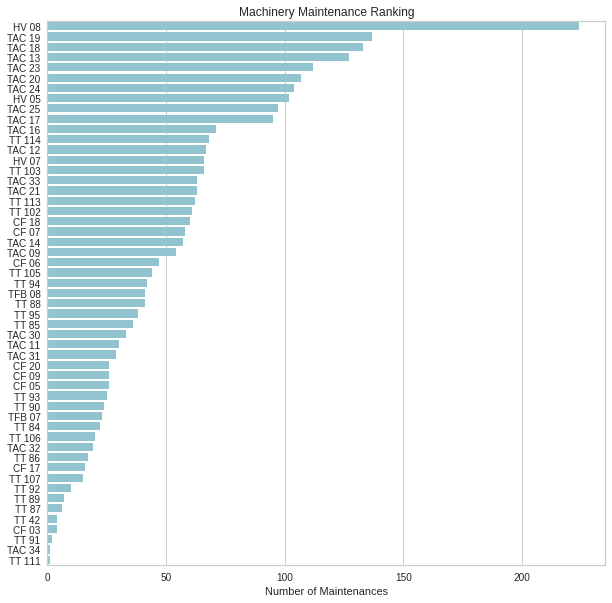

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='MAINTENANCE_ID', y='MACHINERY_ID' , data=df_machinery_maint_count_sort, color='c')
ax.set(title='Machinery Maintenance Ranking', xlabel='Number of Maintenances', ylabel=None)
plt.show()

HV 08 is the machine with the most number of maintenances. Altough, is pretty clear that the top#10 are fill with lots of **TACs** machines as well. Let's check the same results but now grouping by operation.

In [ ]:
#Grouping the number of maintenance records by operation
df_operation_maint_count = df_maintenance_EDA.groupby('OPERATION')['MAINTENANCE_ID'].count().reset_index()
df_operation_maint_count_sort = df_operation_maint_count.sort_values(by=['MAINTENANCE_ID'], ascending=False)
df_operation_maint_count_sort['TOTAL'] = (df_operation_maint_count_sort['MAINTENANCE_ID']/df_operation_maint_count_sort['MAINTENANCE_ID'].sum())*100
df_operation_maint_count_sort

,OPERATION,MAINTENANCE_ID,TOTAL
1,Baldeio,1399,51.264199
0,Arraste,611,22.389154
3,Corte,456,16.709417
2,Carga,263,9.637230


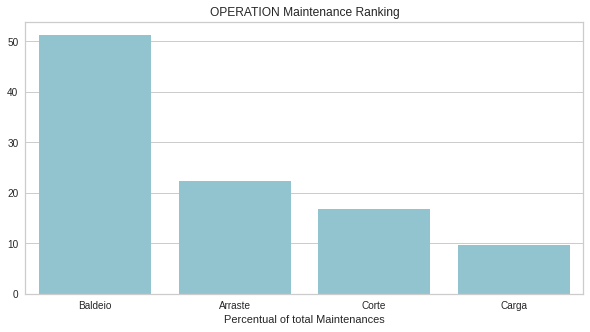

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='OPERATION', y='TOTAL' , data=df_operation_maint_count_sort, color='c')
ax.set(title='OPERATION Maintenance Ranking', xlabel='Percentual of total Maintenances', ylabel=None)
plt.show()

Baldeio operation is more than half maintenance records in the dataset. This is more than double the second operation which is Arraste.

<a id='#most_maintenance_month'></a>
#### *2- What is the mean time to repair in hours in every month?*

In [ ]:
#Creating the field REPAIR_TIME
df_maintenance_EDA['REPAIR_TIME'] = (df_maintenance_EDA.END_TIME-df_maintenance_EDA.START_TIME).astype('timedelta64[h]')

In [ ]:
#Grouping the mean REPAIR_TIME by YEAR-MONTH
df_maintenance_EDA['START_YEAR'] = df_maintenance_EDA['START_TIME'].dt.year
df_maintenance_EDA['START_MONTH'] = df_maintenance_EDA['START_TIME'].dt.month
df_maintenance_EDA['START_DATE_CONCAT'] = df_maintenance_EDA['START_YEAR'].astype(str) + '-' + df_maintenance_EDA['START_MONTH'].astype(str)
df_repair_time_month = df_maintenance_EDA.groupby('START_DATE_CONCAT', as_index=False)['REPAIR_TIME'].mean()

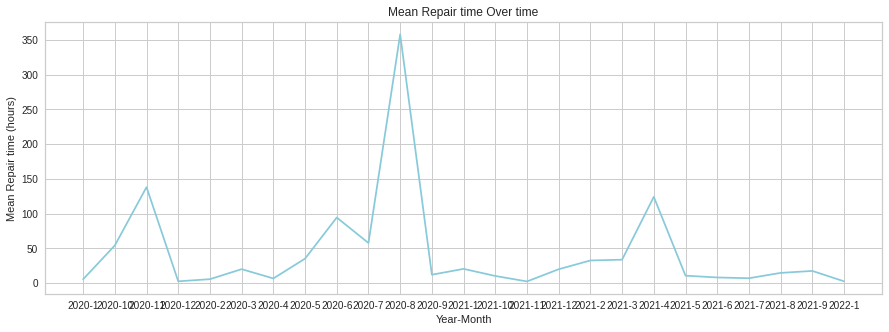

In [ ]:
#Creating line chart
f,ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data = df_repair_time_month, x='START_DATE_CONCAT', y='REPAIR_TIME', color='c')
ax.set(title='Mean Repair time Over time', xlabel='Year-Month', ylabel='Mean Repair time (hours)')
plt.show()

In [ ]:
#Calculating the overall mean
df_repair_time_month['REPAIR_TIME'].mean()

43.965378608252266

The average time to repair is 43.96 hours. That happened because some maintenances were longer than average. In fact if we look to August'2020 the average time was more than 300 hours. Probably this was a complex maintenance.  

<a id='#mean_time_maint'></a>
#### *3- What is the mean time between maintenances per machine and operation group?*

In [ ]:
#Sorting the dataset per MACHINERY_ID, START_TIME and MACHINERY_HOURMETER
df_maintenance_EDA_sorted = df_maintenance_EDA.sort_values(by=['MACHINERY_ID' , 'START_TIME', 'MACHINERY_HOURMETER'], ascending=True)

In [ ]:
#Creating the TIME_SINCE_LAST_REPAIR FILD 
df_maintenance_EDA_sorted['TIME_SINCE_LAST_REPAIR'] = df_maintenance_EDA_sorted.groupby('MACHINERY_ID')['MACHINERY_HOURMETER'].diff(periods=1)
#Replacing all NaN values for 0's
df_maintenance_EDA_sorted.fillna(0,inplace=True)

In [ ]:
#Grouping the MACHINERY into mean TIME_SINCE_LAST_REPAIR
df_machinery_TSLR_mean = df_maintenance_EDA_sorted.groupby('MACHINERY_ID')['TIME_SINCE_LAST_REPAIR'].mean().reset_index()
df_machinery_TSLR_mean_sort = df_machinery_TSLR_mean.sort_values(by=['TIME_SINCE_LAST_REPAIR'], ascending=False)

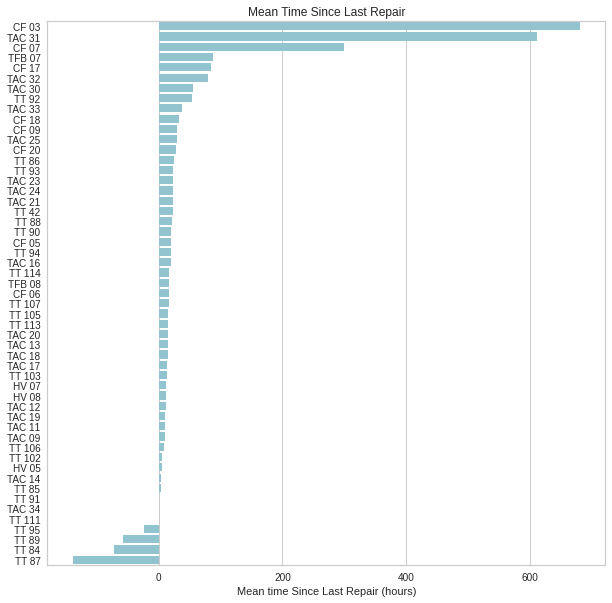

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='TIME_SINCE_LAST_REPAIR', y='MACHINERY_ID' , data=df_machinery_TSLR_mean_sort, color='c')
ax.set(title='Mean Time Since Last Repair', xlabel='Mean time Since Last Repair (hours)', ylabel=None)
plt.show()

The mean time since last repair looks really longer than it should be. Maybe there is some outliers in data that we need to check before going further.

In [ ]:
#Checking TIME_SINCE_LAST_REPAIR per OPERATION GROUP
df_baldeio = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Baldeio']
df_corte = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Corte']
df_arraste = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Arraste']
df_carga = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Carga']

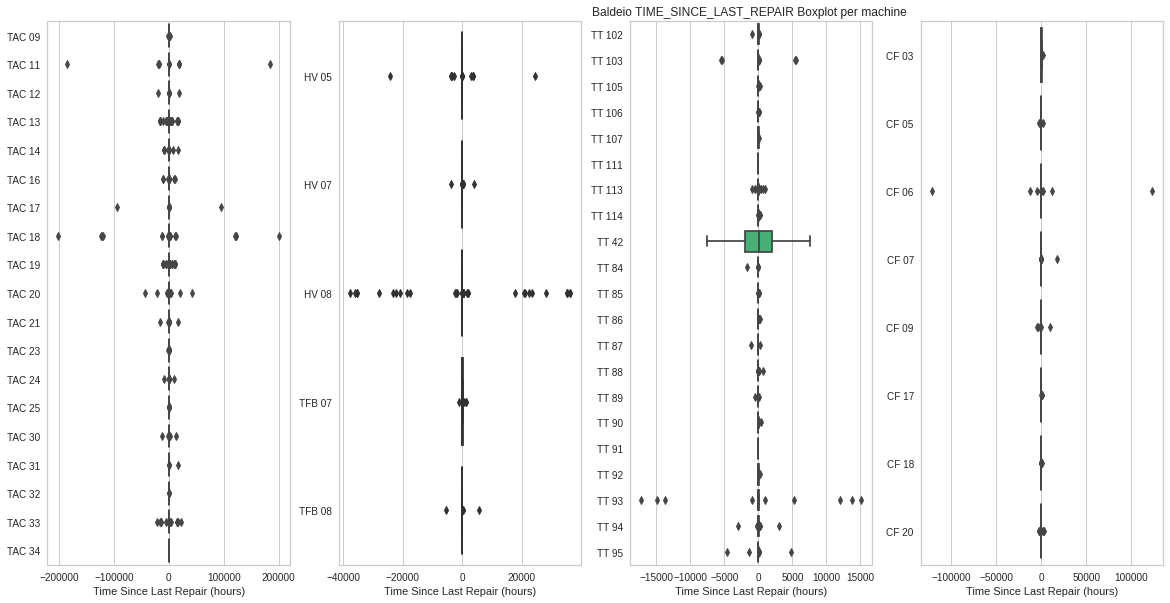

In [ ]:
#Creating Boxplots to better see TIME_SINCE_LAST_REPAIR distribution
f,ax = plt.subplots(figsize=(20, 10), ncols=4)
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_baldeio, ax=ax[0])
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_corte, ax=ax[1])
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_arraste, ax=ax[2])
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_carga, ax=ax[3])
ax[0].set(title=None, xlabel='Time Since Last Repair (hours)', ylabel=None)
ax[1].set(title=None, xlabel='Time Since Last Repair (hours)', ylabel=None)
ax[2].set(title='Baldeio TIME_SINCE_LAST_REPAIR Boxplot per machine ', xlabel='Time Since Last Repair (hours)', ylabel=None)
ax[3].set(title=None, xlabel='Time Since Last Repair (hours)', ylabel=None)
plt.show()

There are many points that looks like errors. I don't know for sure that happened (mistyping, software errors, etc.). But in order to use this field in the future model we have to look and fix each point. In order to get it done I got in touch with people in business that could help me change that values that are for sure wrong and got in the dataset by mistyping of the people and operators in the field. So, let's code that!

In [ ]:
#Fixing the wrong MACHINERY_HOURMETER in the dataset
#TAC11
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2015) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82531), 20150, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2036) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82541), 20360, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2036) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82543), 20360, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2030) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82540), 20300, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2506) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82599), 20465, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2506) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82825), 20506, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==205442) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82800), 20544, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==826) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81007), 19826, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==79845) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 20347), 19743, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20337) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79785), 19733, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20335) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79653), 19533, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20311) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79636), 19311, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20311) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79552), 19311, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20335) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79784), 19335, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20347) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79845), 19743, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==20435) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 11') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82836), 20495, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC12
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2101) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 12') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81572), 21001, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==21060) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 12') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81276), 21074, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC13
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14469) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79639), 16469, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==16886) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81017), 16901, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13149) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81018), 16905, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1613) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81051), 16973, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1673) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81061), 16973, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==23006) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81150), 17072, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1729) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81930), 17290, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==19445) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82168), 17445, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17500) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82229), 17497, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11997) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82399), 17500, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1757) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82534), 17750, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1784) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82609), 17842, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==18833) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82653), 17933, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17763) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82835), 17963, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17775) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82824), 17975, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1806) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82934), 18060, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1147) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82906), 18147, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12719) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79788), 16719, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13305) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81331), 17125, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17083) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81742), 17150, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==16005) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 13') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79614), 16550, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC14
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==9956) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 14') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82761), 9156, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1776) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 14') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82615), 9776, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1561) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 14') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82759), 9770, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==18032) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 14') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82808), 10032, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==9770) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 14') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82759), 9970, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC16
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1130) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81573), 11300, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1181) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82723), 11881, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11534) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81558), 11435, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11363) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81559), 11463, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11378) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81560), 11478, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11505) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81776), 11550, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11508) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81777), 11580, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11882) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82701), 11892, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11421) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 16') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83097), 12490, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC17
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==105876) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 17') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82311), 10592, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==10416) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 17') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81568), 10496, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC18
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12880) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79889), 12740, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==133853) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81351), 13383, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1632) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81621), 13462, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==135090) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81630), 13509, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13301) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81743), 13530, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==135648) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81721), 13564, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11340) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81745), 13566, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13457) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81627), 13574, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==214192) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81771), 13694, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13136) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81847), 13736, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14020) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82160), 13887, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11967) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82180), 14025, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1443) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82619), 14113, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14635) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82594), 14161, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14635) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82594), 14161, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14635) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82820), 14161, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14635) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82594), 14161, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14635) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82820), 14161, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12415) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82611), 14215, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12893) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79801), 12903, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13301) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81355), 13391, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13879) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82159), 13885, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14323) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82760), 14423, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC19
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1116) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79175), 11160, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12279) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79876), 11279, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12292) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79878), 11292, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13207) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81047), 11372, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==21421) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81778), 11672, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1194) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82170), 11940, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1195) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82177), 11950, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17500) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82398), 11980, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11986) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82397), 12146, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1219) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82535), 12195, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1220) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82539), 12220, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17988) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82783), 12488, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12281) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82604), 12512, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12439) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82910), 12539, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12440) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82912), 12540, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12442) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83043), 12542, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12452) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83084), 12542, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12452) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83095), 12590, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12452) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83094), 12592, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12452) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83096), 12598, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12481) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83099), 12606, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12524) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83105), 12624, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12556) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83153), 12656, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12556) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83154), 12656, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==12170) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79185), 11170, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11461) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81356), 11561, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11461) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81744), 11614, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11971) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82200), 11911, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11940) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 19') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82203), 11920, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC20
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==47484) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 80997), 4748, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==26108) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81104), 4888, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==8457) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82536), 5784, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4903) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81089), 5052, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4547) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79874), 4725, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2539) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81848), 5539, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4250) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79446), 4260, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==5777) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82532), 5677, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==5736) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82519), 5677, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC21
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==18196) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 21') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81000), 1819, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1124) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 21') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81589), 2114, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2012) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 21') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81587), 2112, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2389) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 21') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82460), 2689, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2389) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 21') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82460), 2689, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2610) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 21') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82476), 2710, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC24
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==10976) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 24') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81270), 1097, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2202) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 24') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82499), 2022, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC30
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==14685) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 30') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81735), 1426, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1033) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 30') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82734), 1933, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC31
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==9) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 31') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79737), 600, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==42) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 31') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79767), 602, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17730) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 31') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82982), 1773, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC32
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1932) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 32') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82732), 1032, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC33
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4521) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81146), 452, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==5175) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81197), 517, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==5674) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81199), 567, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==577) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81353), 677, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==797) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81623), 827, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==577) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81741), 835, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==15554) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82530), 1554, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==357) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82525), 1573, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==18624) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82595), 1862, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==18624) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82821), 1864, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==17325) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82923), 2325, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==24873) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83111), 2487, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==334) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81034), 340, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1809) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 33') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82834), 1980, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC09
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==25525) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 09') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82716), 27325, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC23
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==117) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 23') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81894), 1170, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2488) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 23') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82510), 2388, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3127) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 23') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83063), 3271, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TAC25
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2028) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 25') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82309), 2182, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2263) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 25') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82496), 2363, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2511) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 25') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82883), 2611, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2778) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 25') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82892), 2877, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3480) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TAC 25') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83118), 3380, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#HV05
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==30865) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81274), 27217, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==27144) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81036), 27244, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==27144) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81055), 27244, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2726) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81054), 27260, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2728) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81065), 27262, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==27258) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81102), 27278, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==24460) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82433), 27460, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==31253) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82466), 27564, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==31255) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82467), 27568, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==31410) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82457), 27673, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==27500) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82459), 27700, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#HV07
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==26987) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 07') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79374), 30747, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==31098) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 07') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82331), 31009, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#HV08
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==19765) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81012), 1997, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2233) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81141), 2223, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==23051) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81200), 2311, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==23224) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81206), 2324, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==23356) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81196), 2356, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==23519) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81211), 2359, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==23561) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81207), 2361, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==5093) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81339), 2390, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==24849) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81349), 2489, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==25972) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81632), 2597, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==26116) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81647), 2611, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==30897) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82163), 3008, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1209) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82234), 3196, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1209) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82402), 3199, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3485) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82537), 3584, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1800) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82605), 3600, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3690) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82597), 3729, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3690) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82823), 3729, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3755) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82638), 3785, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==39128) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82813), 3928, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3918) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82816), 3928, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==39187) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82814), 3930, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==40128) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82908), 3970, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==40137) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82904), 4013, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==41621) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82919), 4062, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==41821) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82926), 4082, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4001) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82939), 4100, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4001) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82981), 4100, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4038) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83000), 4138, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3150) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82179), 3155, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==24849) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'HV 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81350), 2489, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TFB07
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1166) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TFB 07') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81004), 66, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted.drop(df_maintenance_EDA_sorted[(df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2047) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TFB 07') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83157)].index, inplace = True)
#TFB08
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==26) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TFB 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82485), 62, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==6093) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TFB 08') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82947), 693, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT102
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1247) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 102') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82959), 2247, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1273) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 102') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83083), 2273, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1282) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 102') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83114), 2282, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1321) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 102') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83140), 2321, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1322) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 102') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83143), 2322, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT103
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==7018) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 103') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83060), 1568, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==7018) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 103') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83055), 1588, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT105
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==627) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 105') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81140), 726, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT106
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==376) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 106') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79752), 367, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==504) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 106') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79936), 405, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==504) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 106') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79938), 405, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT113
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1255) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 113') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82302), 812, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1932) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 113') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82495), 932, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==557) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 113') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81133), 1136, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT42
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==8442) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 42') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79735), 842, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT84
df_maintenance_EDA_sorted.drop(df_maintenance_EDA_sorted[(df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1865) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 84') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82640)].index, inplace = True)
#TT87
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1300) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 87') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82977), 2400, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT89
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1489) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 89') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79443), 1049, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1054) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 89') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81040), 1064, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT93
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==15244) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 93') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81251), 1524, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==16690) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 93') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81846), 1690, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13935) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 93') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82922), 1900, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==19251) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 93') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82924), 1935, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1973) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 93') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83049), 1986, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2524) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 93') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81337), 1534, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT94
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1305) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81722), 1530, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1575) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82526), 1735, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==4972) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82818), 1972, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2129) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83048), 2169, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1769) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82403), 1729, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1769) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82233), 1729, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1856) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 94') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82600), 1836, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT95
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==6009) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 95') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81954), 1256, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==21) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 95') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83050), 1436, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==31) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 95') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83070), 1446, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT114
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==812) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 114') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81913), 912, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1238) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 114') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83126), 1368, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT85
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2361) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 85') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79406), 2371, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2414) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 85') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79583), 2441, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT88
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1112) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 88') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81570), 1002, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1732) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 88') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83158), 1032, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#TT90
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==990) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 90') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79866), 1000, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1000) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'TT 90') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 79732), 990, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#CF06
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1328) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 06') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81044), 13280, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1330) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 06') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81063), 13300, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==8855) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 06') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81734), 13368, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11407) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 06') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81844), 13407, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==134775) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 06') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81841), 13477, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13803) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 06') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 83110), 13903, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#CF05
df_maintenance_EDA_sorted.drop(df_maintenance_EDA_sorted[(df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==13282) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 05') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81042)].index, inplace = True)
#CF07
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==18886) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 07') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82810), 1886, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#CF09
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3437) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 09') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82907), 8337, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2089) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 09') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82920), 8389, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==11490) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 09') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82949), 8440, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#CF18
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1591) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82340), 1691, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==1920) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 18') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 82621), 1720, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#CF20
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==328) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81103), 138, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2089) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81340), 208, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==2460) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81365), 264, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==3037) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 20') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 81736), 337, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)
#CF03
df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] = np.where((df_maintenance_EDA_sorted['MACHINERY_HOURMETER'] ==174063) & (df_maintenance_EDA_sorted['MACHINERY_ID']  == 'CF 03') & (df_maintenance_EDA_sorted['MAINTENANCE_ID']  == 80996), 171683, df_maintenance_EDA_sorted.MACHINERY_HOURMETER)

In [ ]:
#Sorting the dataset per MACHINERY_ID and MACHINERY_HOURMETER (AGAIN)
df_maintenance_EDA_sorted = df_maintenance_EDA_sorted.sort_values(by=['MACHINERY_ID' , 'START_TIME','MACHINERY_HOURMETER'], ascending=True)

In [ ]:
#Creating the TIME_SINCE_LAST_REPAIR FILD (AGAIN)
df_maintenance_EDA_sorted['TIME_SINCE_LAST_REPAIR'] = df_maintenance_EDA_sorted.groupby('MACHINERY_ID')['MACHINERY_HOURMETER'].diff(periods=1)
#Replacing all NaN values for 0's
df_maintenance_EDA_sorted.fillna(0,inplace=True)

In [ ]:
#Grouping the MACHINERY into mean TIME_SINCE_LAST_REPAIR
df_machinery_TSLR_mean = df_maintenance_EDA_sorted.groupby('MACHINERY_ID')['TIME_SINCE_LAST_REPAIR'].mean().reset_index()
df_machinery_TSLR_mean_sort = df_machinery_TSLR_mean.sort_values(by=['TIME_SINCE_LAST_REPAIR'], ascending=False)

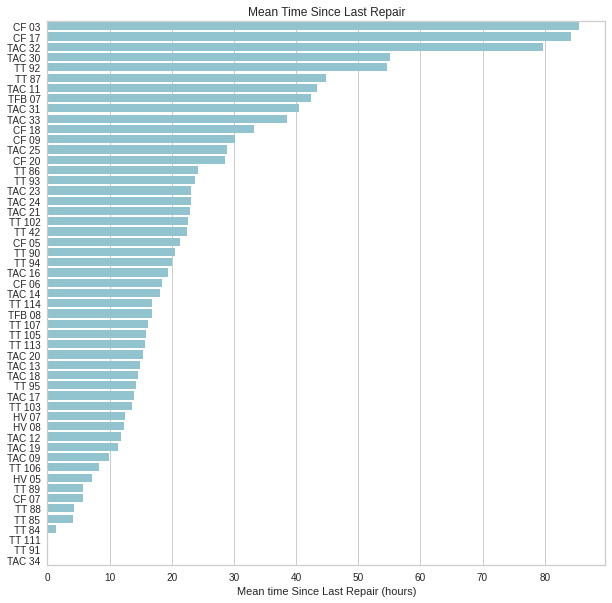

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='TIME_SINCE_LAST_REPAIR', y='MACHINERY_ID' , data=df_machinery_TSLR_mean_sort, color='c')
ax.set(title='Mean Time Since Last Repair', xlabel='Mean time Since Last Repair (hours)', ylabel=None)
plt.show()

In [ ]:
#Checking TIME_SINCE_LAST_REPAIR per OPERATION GROUP
df_baldeio = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Baldeio']
df_corte = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Corte']
df_arraste = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Arraste']
df_carga = df_maintenance_EDA_sorted[df_maintenance_EDA_sorted.OPERATION == 'Carga']

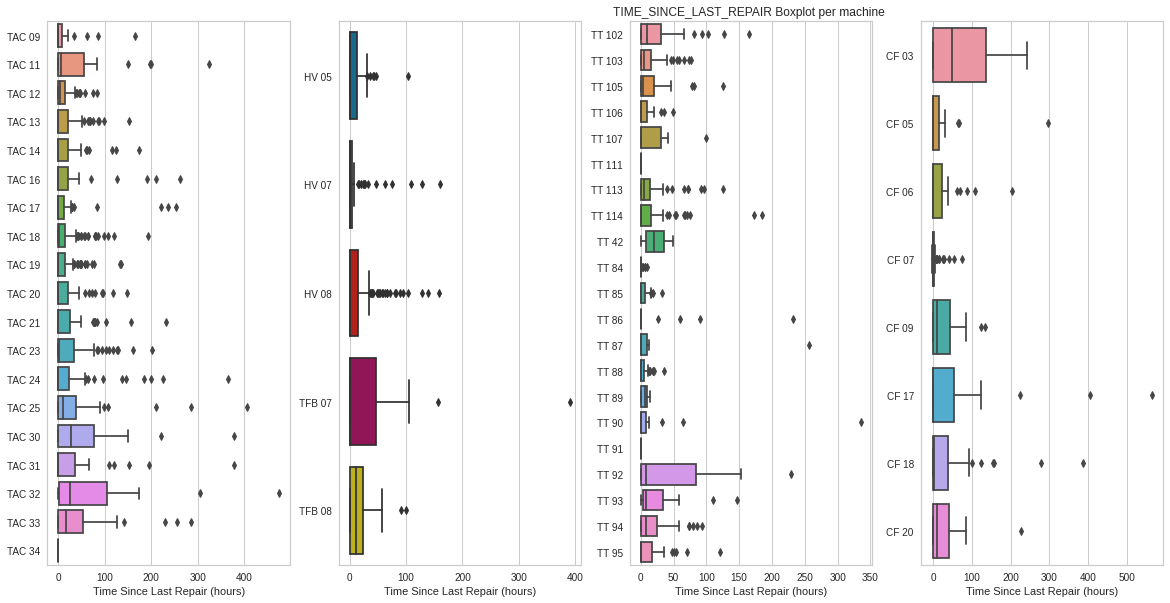

In [ ]:
#Creating Boxplots to better see TIME_SINCE_LAST_REPAIR distribution
f,ax = plt.subplots(figsize=(20, 10), ncols=4)
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_baldeio, ax=ax[0])
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_corte, ax=ax[1])
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_arraste, ax=ax[2])
sns.boxplot(x="TIME_SINCE_LAST_REPAIR", y="MACHINERY_ID", data=df_carga, ax=ax[3])
ax[0].set(title=None, xlabel='Time Since Last Repair (hours)', ylabel=None)
ax[1].set(title=None, xlabel='Time Since Last Repair (hours)', ylabel=None)
ax[2].set(title='TIME_SINCE_LAST_REPAIR Boxplot per machine ', xlabel='Time Since Last Repair (hours)', ylabel=None)
ax[3].set(title=None, xlabel='Time Since Last Repair (hours)', ylabel=None)
plt.show()

In [ ]:
#Calculating the overall mean
overall_mean = df_maintenance_EDA_sorted['TIME_SINCE_LAST_REPAIR'].mean()
#Calculating the overall mean for BALDEIO machinery
baldeio_mean = df_baldeio['TIME_SINCE_LAST_REPAIR'].mean()
#Calculating the overall mean for CORTE machinery
corte_mean = df_corte['TIME_SINCE_LAST_REPAIR'].mean()
#Calculating the overall mean for ARRASTE machinery
arraste_mean = df_arraste['TIME_SINCE_LAST_REPAIR'].mean()
#Calculating the overall mean for CARGA machinery
carga_mean = df_carga['TIME_SINCE_LAST_REPAIR'].mean()
print(" Overall:", overall_mean, "\n Baldeio:", baldeio_mean, "\n Corte:", corte_mean, "\n Arraste:", arraste_mean, "\n Carga:", carga_mean)

 Overall: 19.115920763022743 
 Baldeio: 21.13867047891351 
 Corte: 13.010989010989011 
 Arraste: 15.87049180327869 
 Carga: 26.47328244274809


After all this fixing. We have way better results and now our *Mean Time Between Repairs* is hours is around 19 hours, which makes more sense. We also can see that **Corte Machinery** happens to need maintenance faster than the other groups. We now can move further in the analysis!

In [ ]:
#Creating a copy of the dataframe
df_maintenance_EDA_TSLR = df_maintenance_EDA_sorted.copy()

<a id='#share_type_maintenance'></a>
#### *4- From the total records how many were Corrective and Preventive per month?*

In [ ]:
#Grouping the number of maintenance records by MAINTENANCE_TYPE
df_MAINTENANCE_TYPE_maint_count = df_maintenance_EDA_sorted.groupby('MAINTENANCE_TYPE')['MAINTENANCE_ID'].count().reset_index()
df_df_MAINTENANCE_TYPE_maint_count_sort = df_MAINTENANCE_TYPE_maint_count.sort_values(by=['MAINTENANCE_ID'], ascending=False)
df_df_MAINTENANCE_TYPE_maint_count_sort['TOTAL'] = (df_df_MAINTENANCE_TYPE_maint_count_sort['MAINTENANCE_ID']/df_df_MAINTENANCE_TYPE_maint_count_sort['MAINTENANCE_ID'].sum())*100
df_df_MAINTENANCE_TYPE_maint_count_sort

,MAINTENANCE_TYPE,MAINTENANCE_ID,TOTAL
0,Corretiva,1838,67.424798
1,Preventiva,822,30.154072
2,Revisão Periódica,66,2.421130


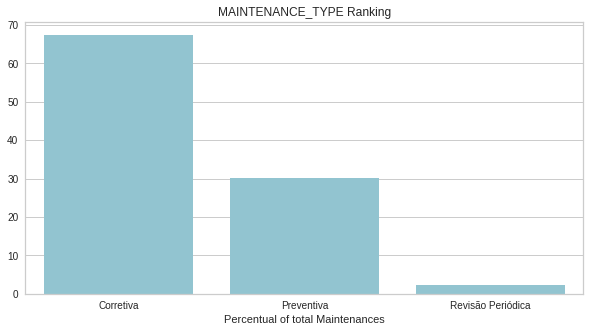

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='MAINTENANCE_TYPE', y='TOTAL' , data=df_df_MAINTENANCE_TYPE_maint_count_sort, color='c')
ax.set(title='MAINTENANCE_TYPE Ranking', xlabel='Percentual of total Maintenances', ylabel=None)
plt.show()

From the results we can see that 68.4% of total maintenances are Corretiva and 29.6% are Preventiva. Where Corretiva means maintenances that were performed after machine failure and Preventiva before machine failure.

In [ ]:
#Grouping the mean MAINTENANCE_TYPE by YEAR-MONTH
df_MAINTENANCE_TYPE_month = df_maintenance_EDA_sorted.groupby(['START_DATE_CONCAT', 'MAINTENANCE_TYPE'], as_index=False)['MAINTENANCE_ID'].count()

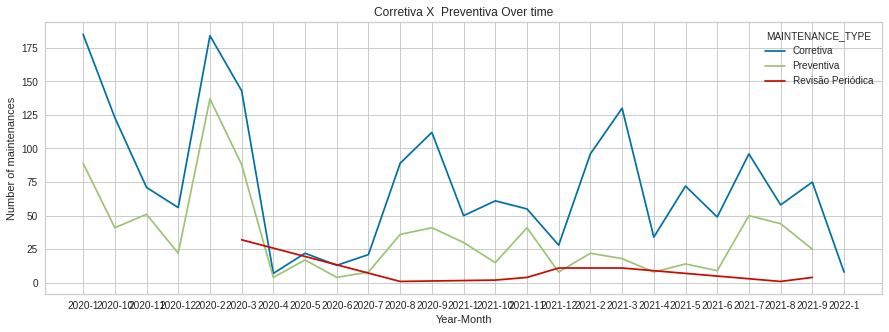

In [ ]:
#Creating line chart
f,ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data = df_MAINTENANCE_TYPE_month, x='START_DATE_CONCAT', y='MAINTENANCE_ID', color='c', hue='MAINTENANCE_TYPE')
ax.set(title='Corretiva X  Preventiva Over time', xlabel='Year-Month', ylabel='Number of maintenances')
plt.show()

In a month to month analysis we can see that the April, May and June 2020 had the least number of maintenances in each MAINTENANCE_TYPE, that probabily happened because of pandemic, where most of the operations were shutted down. Is possible to also see that January, February and March were the months where the number of Preventiva were the closest to Preventiva and after the pandemic months those numbers never came close again.

<a id='#main_parts'></a>
#### *5- What are the main parts used in maintenances?*

In [ ]:
#Grouping the maintenances in PART_TYPE
df_PART_TYPE= df_maintenance_EDA_sorted.groupby('PART_TYPE')['MAINTENANCE_ID'].count().reset_index()
df_PART_TYPE_sorted = df_PART_TYPE.sort_values(by=['MAINTENANCE_ID'], ascending=False)

In [ ]:
#Calculating the percent of total
df_PART_TYPE_sorted['TOTAL'] = (df_PART_TYPE_sorted['MAINTENANCE_ID']/df_PART_TYPE_sorted['MAINTENANCE_ID'].sum())*100
df_PART_TYPE_sorted

,PART_TYPE,MAINTENANCE_ID,TOTAL
23,TERMINAL HIDRAULICO,534,19.589142
8,MANGUEIRA HIDRÁULICA,469,17.204696
2,DIVERSOS,332,12.179017
3,ELETRODOS,327,11.995598
5,FILTROS,272,9.977990
19,PEÇAS VALTRA,188,6.896552
9,MANUAL REPAIR,169,6.199560
13,PARAFUSO,103,3.778430
12,OLEOS E LUBRIFICANTES,66,2.421130
17,PEÇAS TMO,61,2.237711


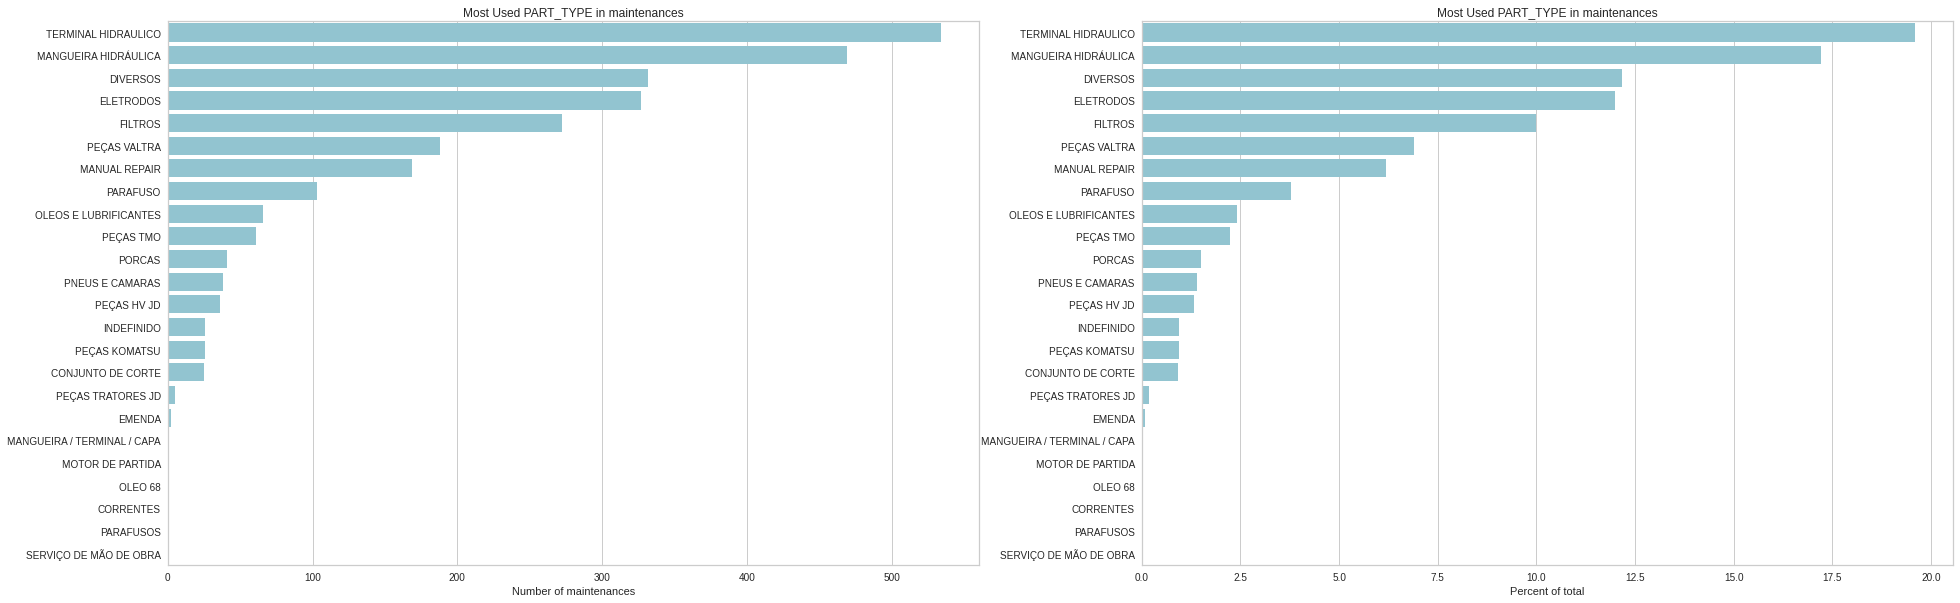

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(32, 10), ncols=2)
sns.barplot(x='MAINTENANCE_ID', y='PART_TYPE' , data=df_PART_TYPE_sorted, color='c', ax=ax[0])
sns.barplot(x='TOTAL', y='PART_TYPE' , data=df_PART_TYPE_sorted, color='c', ax=ax[1])
ax[0].set(title='Most Used PART_TYPE in maintenances', xlabel='Number of maintenances', ylabel=None)
ax[1].set(title='Most Used PART_TYPE in maintenances', xlabel='Percent of total', ylabel=None)
plt.show()

**TERMINAL HIDRAULICO** and **MANGUEIRA HIDRAULICA** are the ones that are most frequently used in maintenances (Almost 40% of total combined), since there are many other parts in the dataset we could consider only this 2 parts in the future modeling.

<a id='#operational_season'></a>
#### *6- Which operational season had the most maintenance records?*

> To define operational seasons we use the following standard: <br>
> **WET**: October, November, December, January, February and March <br>
> **DRY**: April, May, June, July, Agust and September

In [ ]:
#Creating the OPERATIONAL_SEASON field
conditions = [
              (df_maintenance_EDA_TSLR['START_MONTH'].isin( [10 , 11, 12, 1, 2, 3])),
              (df_maintenance_EDA_TSLR['START_MONTH'].isin( [4, 5, 6, 7, 8, 9] ))]
choices = ['WET' , 'DRY']
df_maintenance_EDA_TSLR['OPERATIONAL_SEASON'] = np.select(conditions,choices, default='Erro')

#Grouping the maintenances in OPERATIONAL_SEASON
df_OPERATIONAL_SEASON= df_maintenance_EDA_TSLR.groupby('OPERATIONAL_SEASON')['MAINTENANCE_ID'].count().reset_index()
df_OPERATIONAL_SEASON_sorted = df_OPERATIONAL_SEASON.sort_values(by=['MAINTENANCE_ID'], ascending=False)

#Calculating the percent of total
df_OPERATIONAL_SEASON_sorted['TOTAL'] = (df_OPERATIONAL_SEASON_sorted['MAINTENANCE_ID']/df_OPERATIONAL_SEASON_sorted['MAINTENANCE_ID'].sum())*100
df_OPERATIONAL_SEASON_sorted

,OPERATIONAL_SEASON,MAINTENANCE_ID,TOTAL
1,WET,1812,66.47102
0,DRY,914,33.52898


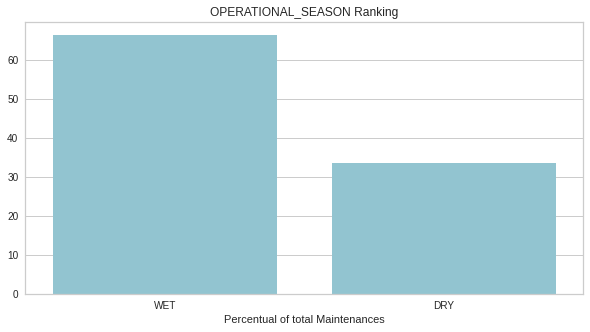

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='OPERATIONAL_SEASON', y='TOTAL' , data=df_OPERATIONAL_SEASON_sorted, color='c')
ax.set(title='OPERATIONAL_SEASON Ranking', xlabel='Percentual of total Maintenances', ylabel=None)
plt.show()

More than 65% of the maintenances in the dataset were performed in the WET season, this result can be somehow biased because we saw previously that in the DRY season of 2020 we had the pandemic were most part of operations were shutted down. Anyway this can be used in the future model as well.

In [ ]:
#Creating a copy of the dataframe
df_maintenance_EDA_SEASON = df_maintenance_EDA_TSLR.copy()

<a id='#time_to_failure'></a>
#### *7- What is the mean time to failure per machine and operation group?*

In [ ]:
#Sorting the dataset per MACHINERY_ID, START_TIME and MACHINERY_HOURMETER
df_maintenance_EDA_SEASON = df_maintenance_EDA_SEASON.sort_values(by=['MACHINERY_ID' , 'START_TIME', 'MACHINERY_HOURMETER'], ascending=True)

In [ ]:
#Creating the TIME_TO_NEXT_REPAIR field
df_maintenance_EDA_SEASON['TIME_TO_NEXT_REPAIR'] = df_maintenance_EDA_SEASON.groupby('MACHINERY_ID')['MACHINERY_HOURMETER'].diff(periods=-1)
#Replacing all NaN values for 0's
df_maintenance_EDA_SEASON.fillna(0,inplace=True)
#Making all negative values positive
df_maintenance_EDA_SEASON['TIME_TO_NEXT_REPAIR'] = df_maintenance_EDA_SEASON['TIME_TO_NEXT_REPAIR']*-1
#Replacing all -0.00 values to 0.00
df_maintenance_EDA_SEASON['TIME_TO_NEXT_REPAIR'] .replace({-0.0: 0.0}, inplace=True)

In [ ]:
#Grouping the MACHINERY into mean TIME_TO_NEXT_REPAIR
df_machinery_TTNR_mean = df_maintenance_EDA_SEASON.groupby('MACHINERY_ID')['TIME_TO_NEXT_REPAIR'].mean().reset_index()
df_machinery_TTNR_mean_sort = df_machinery_TTNR_mean.sort_values(by=['TIME_TO_NEXT_REPAIR'], ascending=False)

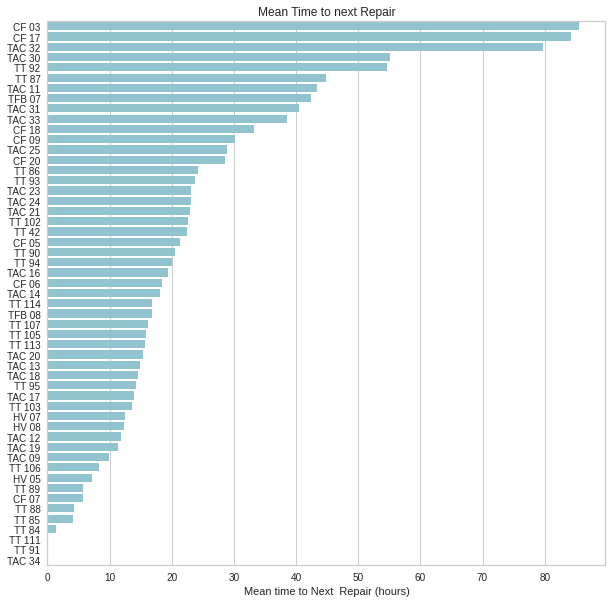

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='TIME_TO_NEXT_REPAIR', y='MACHINERY_ID' , data=df_machinery_TTNR_mean_sort, color='c')
ax.set(title='Mean Time to next Repair', xlabel='Mean time to Next  Repair (hours)', ylabel=None)
plt.show()

In [ ]:
#Checking TIME_SINCE_LAST_REPAIR per OPERATION GROUP
df_baldeio2 = df_maintenance_EDA_SEASON[df_maintenance_EDA_SEASON.OPERATION == 'Baldeio']
df_corte2 = df_maintenance_EDA_SEASON[df_maintenance_EDA_SEASON.OPERATION == 'Corte']
df_arraste2 = df_maintenance_EDA_SEASON[df_maintenance_EDA_SEASON.OPERATION == 'Arraste']
df_carga2 = df_maintenance_EDA_SEASON[df_maintenance_EDA_SEASON.OPERATION == 'Carga']

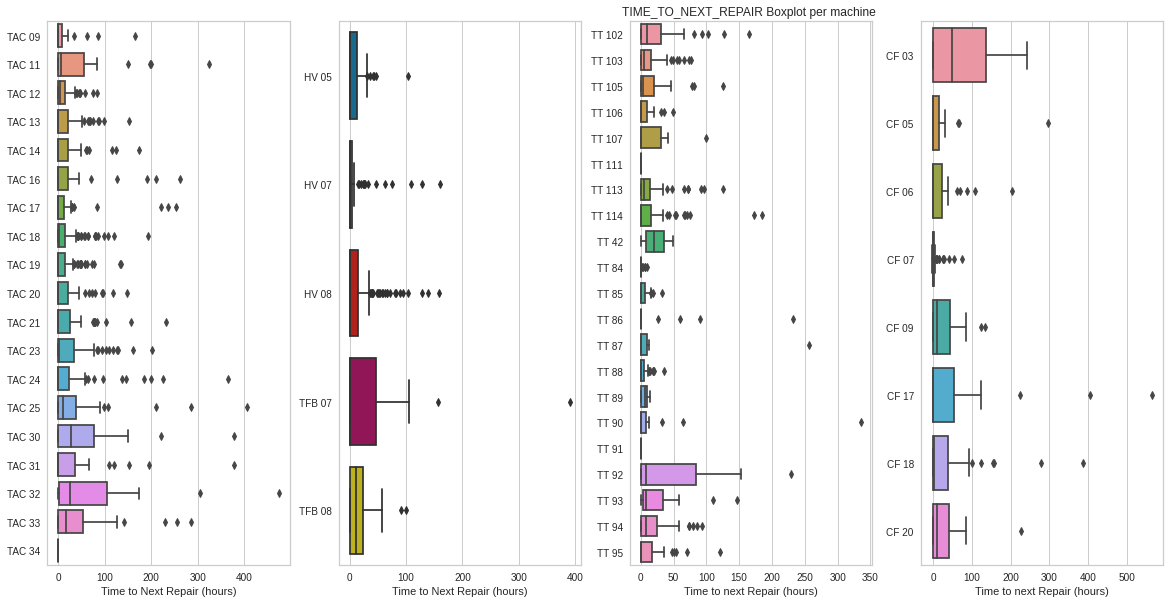

In [ ]:
#Creating Boxplots to better see TIME_TO_NEXT_REPAIR distribution
f,ax = plt.subplots(figsize=(20, 10), ncols=4)
sns.boxplot(x="TIME_TO_NEXT_REPAIR", y="MACHINERY_ID", data=df_baldeio2, ax=ax[0])
sns.boxplot(x="TIME_TO_NEXT_REPAIR", y="MACHINERY_ID", data=df_corte2, ax=ax[1])
sns.boxplot(x="TIME_TO_NEXT_REPAIR", y="MACHINERY_ID", data=df_arraste2, ax=ax[2])
sns.boxplot(x="TIME_TO_NEXT_REPAIR", y="MACHINERY_ID", data=df_carga2, ax=ax[3])
ax[0].set(title=None, xlabel='Time to Next Repair (hours)', ylabel=None)
ax[1].set(title=None, xlabel='Time to Next Repair (hours)', ylabel=None)
ax[2].set(title='TIME_TO_NEXT_REPAIR Boxplot per machine ', xlabel='Time to next Repair (hours)', ylabel=None)
ax[3].set(title=None, xlabel='Time to next Repair (hours)', ylabel=None)
plt.show()

In [ ]:
df_maintenance_EDA_SEASON.head()

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION,REPAIR_TIME,START_YEAR,START_MONTH,START_DATE_CONCAT,TIME_SINCE_LAST_REPAIR,OPERATIONAL_SEASON,TIME_TO_NEXT_REPAIR
479,79842,2020-03-26 00:00:00,2020-03-26 00:00:00,SERVIÇO DE MÃO DE OBRA,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171341,170,Carga,0.0,2020,3,2020-3,0.0,WET,242.0
544,79931,2020-04-06 00:00:00,2020-04-06 00:00:00,OLEO 68,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171583,170,Carga,0.0,2020,4,2020-4,242.0,DRY,0.0
1538,79931,2020-04-06 00:00:00,2020-04-06 00:00:00,MANGUEIRA / TERMINAL / CAPA,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171583,170,Carga,0.0,2020,4,2020-4,0.0,DRY,100.0
542,80996,2020-07-28 00:00:00,2020-07-28 00:00:00,MOTOR DE PARTIDA,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171683,174,Carga,0.0,2020,7,2020-7,100.0,DRY,0.0
478,79420,2020-01-28 15:30:00,2020-01-28 16:40:00,PNEUS E CAMARAS,Capim Branco,Corretiva,CAMARA DE AR DIVERSOS,Pneu Furado,1.0,CF 05,11065,146,Carga,1.0,2020,1,2020-1,0.0,WET,0.0


Since the results are pretty much the same as **TIME_SINCE_LAST_REPAIR** but in difference row position, the graphs and results don't change. But now we have our dependent variable to the upcoming model.

In [ ]:
#Creating a copy of the dataframe
df_maintenance_EDA_TTNR = df_maintenance_EDA_SEASON.copy()

<a id='#time_to_failure'></a>
#### *8- What is the mean age per operation group?*

In [ ]:
df_maintenance_EDA_TTNR.head()

,MAINTENANCE_ID,START_TIME,END_TIME,PART_TYPE,MAINTENANCE_LOCAL,MAINTENANCE_TYPE,SERVICE_NAME,OBSERVATION,PART_NUMBER,MACHINERY_ID,MACHINERY_HOURMETER,AGE,OPERATION,REPAIR_TIME,START_YEAR,START_MONTH,START_DATE_CONCAT,TIME_SINCE_LAST_REPAIR,OPERATIONAL_SEASON,TIME_TO_NEXT_REPAIR
479,79842,2020-03-26 00:00:00,2020-03-26 00:00:00,SERVIÇO DE MÃO DE OBRA,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171341,170,Carga,0.0,2020,3,2020-3,0.0,WET,242.0
544,79931,2020-04-06 00:00:00,2020-04-06 00:00:00,OLEO 68,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171583,170,Carga,0.0,2020,4,2020-4,242.0,DRY,0.0
1538,79931,2020-04-06 00:00:00,2020-04-06 00:00:00,MANGUEIRA / TERMINAL / CAPA,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171583,170,Carga,0.0,2020,4,2020-4,0.0,DRY,100.0
542,80996,2020-07-28 00:00:00,2020-07-28 00:00:00,MOTOR DE PARTIDA,Industria Cáceres - Serraria,Corretiva,SERVICE WITHOUT PARTS,0,1.0,CF 03,171683,174,Carga,0.0,2020,7,2020-7,100.0,DRY,0.0
478,79420,2020-01-28 15:30:00,2020-01-28 16:40:00,PNEUS E CAMARAS,Capim Branco,Corretiva,CAMARA DE AR DIVERSOS,Pneu Furado,1.0,CF 05,11065,146,Carga,1.0,2020,1,2020-1,0.0,WET,0.0


In [ ]:
#Grouping the OPERATIONS into mean AGE
df_operation_age = df_maintenance_EDA_TTNR.groupby('OPERATION')['AGE'].mean().reset_index()
df_operation_age_sort = df_operation_age.sort_values(by=['AGE'], ascending=False)

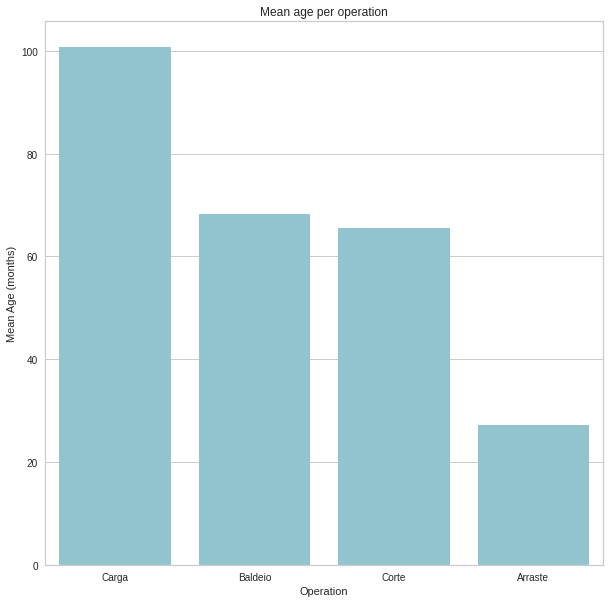

In [ ]:
# Creating a bar chart to display the data
f,ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='OPERATION', y='AGE' , data=df_operation_age_sort, color='c')
ax.set(title='Mean age per operation', xlabel='Operation', ylabel='Mean Age (months)')
plt.show()

In [ ]:
#Checking TIME_SINCE_LAST_REPAIR per OPERATION GROUP
df_baldeio3 = df_operation_age_sort[df_operation_age_sort.OPERATION == 'Baldeio']
df_corte3 = df_operation_age_sort[df_operation_age_sort.OPERATION == 'Corte']
df_arraste3 = df_operation_age_sort[df_operation_age_sort.OPERATION == 'Arraste']
df_carga3 = df_operation_age_sort[df_operation_age_sort.OPERATION == 'Carga']

In [ ]:
#Calculating the overall mean
overall_mean = df_operation_age_sort['AGE'].mean()
#Calculating the overall mean for BALDEIO machinery
baldeio_mean = df_baldeio3['AGE'].mean()
#Calculating the overall mean for CORTE machinery
corte_mean = df_corte3['AGE'].mean()
#Calculating the overall mean for ARRASTE machinery
arraste_mean = df_arraste3['AGE'].mean()
#Calculating the overall mean for CARGA machinery
carga_mean = df_carga3['AGE'].mean()
print(" Overall:", overall_mean, "\n Baldeio:", baldeio_mean, "\n Corte:", corte_mean, "\n Arraste:", arraste_mean, "\n Carga:", carga_mean)

 Overall: 65.40677195072371 
 Baldeio: 68.15439599714081 
 Corte: 65.48351648351648 
 Arraste: 27.28688524590164 
 Carga: 100.70229007633588


The Overall age of the machinery is 65 months, which means most part of the machinery are in the end of their life cycle. But we can see differences between operations, **Arraste** has the newest machines while **Carga** the oldest. So we better use age as a feature in our upcoming model.

<a id='modeling'></a>
## Modeling

After all this gathering, cleaning and exploratory data analysis we now are going to start to create a model that predicts the *Time to Next Repair* which is our main goal here. In order to be concise and achieve better results we are going to set a few definitions before we start, such as: <br>
> - We fill focus on *PART_TYPE == TERMINAL HIDRAULICO* which is the part with more records in the dataset (near 20%), and it is pretty much likely to be combined with **MANGUEIRA HIDRÁULICA** in each maintenance, and both combined are near 40% of the dataset. So we will focus on modeling the the *Time to Next Repair* to only the more frequent *PART_TYPE* in the dataset;

**Metrics** <br>
We will evaluate the accuracy of  various models using the library PyCaret.PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is incredibly popular for its ease of use, simplicity, and ability to quickly and efficiently build and deploy end-to-end ML prototypes.
PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is incredibly popular for its ease of use, simplicity, and ability to quickly and efficiently build and deploy end-to-end ML prototypes.
We will etermine our winning model based on common regression metrics: <br>

> **Mean Absolute ERROR (MAE)**; <br>
I selected MAE because it is a commum measure of evaluating models, it measures erros between pairs of observations and it is easy to be explained since it has the same unit as the original data. Mean absolute error considers differences between prediction values and actual values and consolidate the mean value, where all values have the same weight. <br>
> **Root Mean Squared Error (RMSE)** <br>
I will also use RMSE because because it also measure the magnitude of errors but in RMSE are squared foot before the average, so this will lead to a higher weight to large errors. So, consider the RMSE can be useful to detect when large errors happen

Now we can start modelling. When we identify the model with the metrics.

In [ ]:
#Creating a copy of the dataset
df_modeling = df_maintenance_EDA_TTNR.copy()

In [ ]:
#Filtering only maintenances that are from TERMINAL HIDRAULICO
df_modeling_TH = df_modeling.loc[df_modeling['PART_TYPE'] == 'TERMINAL HIDRAULICO']

In [ ]:
#Fixing the TIME_SINCE_LAST_REPAIR and TIME_TO_NEXT_REPAIR
#Dropping the old columns
df_modeling_TH.drop(['TIME_SINCE_LAST_REPAIR', 'TIME_TO_NEXT_REPAIR'], axis=1)
#Sorting the dataset per MACHINERY_ID, START_TIME and MACHINERY_HOURMETER
df_modeling_TH = df_modeling_TH.sort_values(by=['MACHINERY_ID' , 'START_TIME', 'MACHINERY_HOURMETER'], ascending=True)
#Creating the TIME_SINCE_LAST_REPAIR FIELD 
df_modeling_TH['TIME_SINCE_LAST_REPAIR'] = df_modeling_TH.groupby('MACHINERY_ID')['MACHINERY_HOURMETER'].diff(periods=1)
#Creating the TIME_TO_NEXT_REPAIR field
df_modeling_TH['TIME_TO_NEXT_REPAIR'] = df_modeling_TH.groupby('MACHINERY_ID')['MACHINERY_HOURMETER'].diff(periods=-1)
#Replacing all NaN values for 0's
df_modeling_TH.fillna(0,inplace=True)
#Making all negative values positive
df_modeling_TH['TIME_TO_NEXT_REPAIR'] = df_modeling_TH['TIME_TO_NEXT_REPAIR']*-1
#Replacing all -0.00 values to 0.00
df_modeling_TH['TIME_TO_NEXT_REPAIR'].replace({-0.0: 0.0}, inplace=True)

In [ ]:
#Importing libraries
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
!pip install lime
from lime import lime_tabular
!pip install pycaret
from pycaret.regression import *

In [ ]:
#Dropping columns that won't be used
df_modeling_TH = df_modeling_TH.drop(['START_TIME',
                     'END_TIME' ,
                     'PART_TYPE' ,
                     'MAINTENANCE_LOCAL',
                     'SERVICE_NAME',
                     'OBSERVATION', 'PART_NUMBER',
                     'MACHINERY_ID', 
                     'REPAIR_TIME', 
                     'START_YEAR' ,
                     'START_MONTH' , 
                     'START_DATE_CONCAT'], axis=1)

In [ ]:
#Describing summary statistics
df_modeling_TH.describe()

,MAINTENANCE_ID,MACHINERY_HOURMETER,AGE,TIME_SINCE_LAST_REPAIR,TIME_TO_NEXT_REPAIR
count,534.000000,534.000000,534.000000,534.000000,534.000000
mean,81032.046816,8473.466292,63.172285,72.750936,72.750936
std,1376.985152,9211.408321,54.113704,128.150195,128.150195
min,78950.000000,19.000000,1.000000,0.000000,0.000000
25%,79567.250000,1427.000000,18.000000,0.000000,0.000000
50%,81205.500000,3077.000000,35.000000,26.000000,26.000000
75%,82409.750000,13206.750000,95.000000,83.500000,83.500000
max,83155.000000,31565.000000,181.000000,997.000000,997.000000


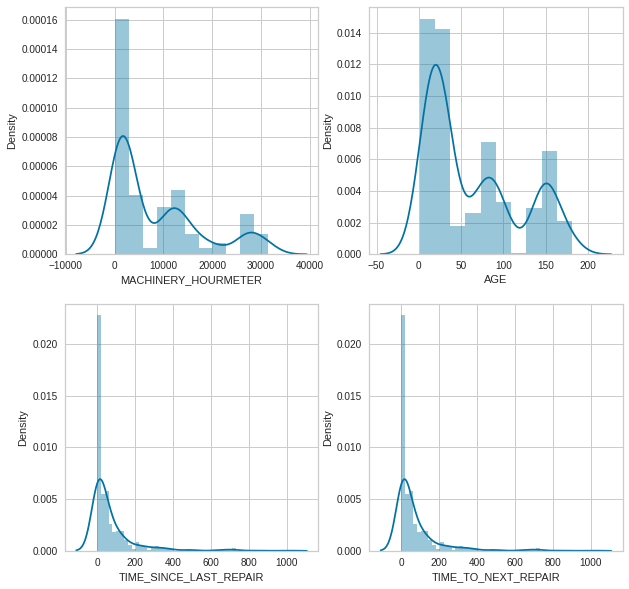

In [ ]:
#Checking the distributions in histograms
plt.figure(figsize=(10, 10))
col = ['MACHINERY_HOURMETER', 'AGE' , 'TIME_SINCE_LAST_REPAIR', 'TIME_TO_NEXT_REPAIR']
for i,c in enumerate(col):
  plt.subplot(2, 2, i+1)
  sns.distplot(df_modeling_TH[c])

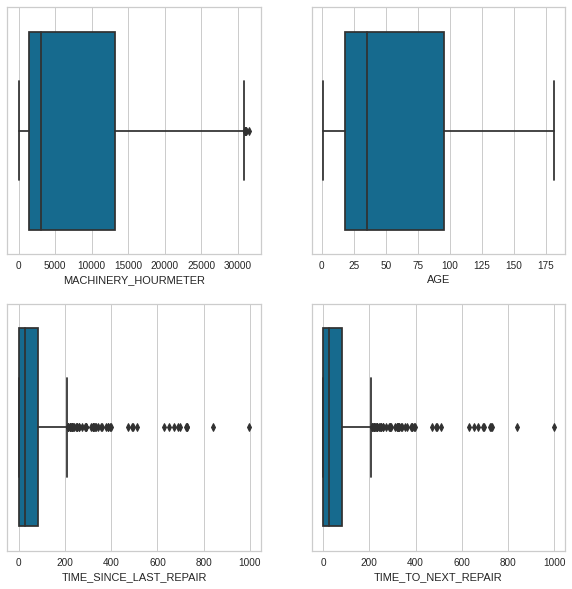

In [ ]:
#Checking the distributions in boxplot
plt.figure(figsize=(10, 10))
col = ['MACHINERY_HOURMETER', 'AGE'  , 'TIME_SINCE_LAST_REPAIR', 'TIME_TO_NEXT_REPAIR' ]
for i,c in enumerate(col):
  plt.subplot(2, 2, i+1)
  sns.boxplot(df_modeling_TH[c])

By the distributions we can see that we don't have normal distributions in MACHINERY_HOURMETER and AGE. TIME_SINCE_LAST_REPAIR and TIME_TO_NEXT_REPAIR are pretty much skewed and TIME_SINCE_LAST_REPAIR and TIME_TO_NEXT_REPAIR have some datapoints that are outliers, in order to get better results on the model I will remove them.

In [ ]:
#Filtering only maintenances that TIME_SINCE_LAST_REPAIR is less than 100
df_modeling_TH2 = df_modeling_TH.loc[df_modeling_TH['TIME_SINCE_LAST_REPAIR'] < 100]

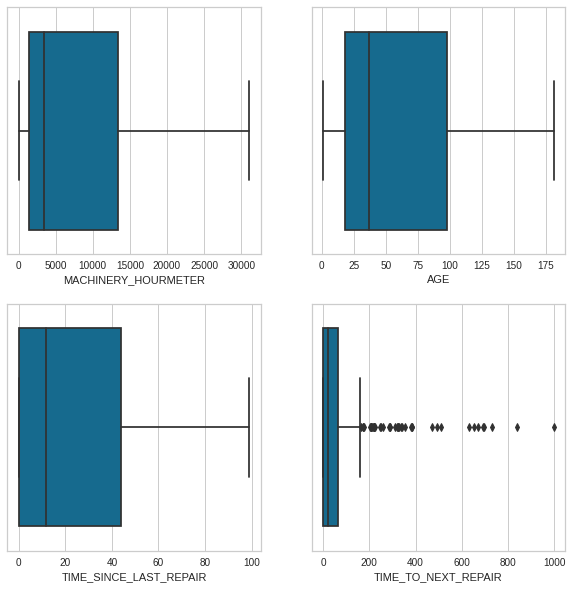

In [ ]:
#Checking the distributions in boxplot (AGAIN)
plt.figure(figsize=(10, 10))
col2 = ['MACHINERY_HOURMETER', 'AGE' , 'TIME_SINCE_LAST_REPAIR' , 'TIME_TO_NEXT_REPAIR']
for i,c in enumerate(col2):
  plt.subplot(2, 2, i+1)
  sns.boxplot(df_modeling_TH2[c])

In [ ]:
#Filtering only maintenances that TIME_TO_NEXT_REPAIR is less than 100
df_modeling_TH3 = df_modeling_TH2.loc[df_modeling_TH['TIME_TO_NEXT_REPAIR'] < 100]

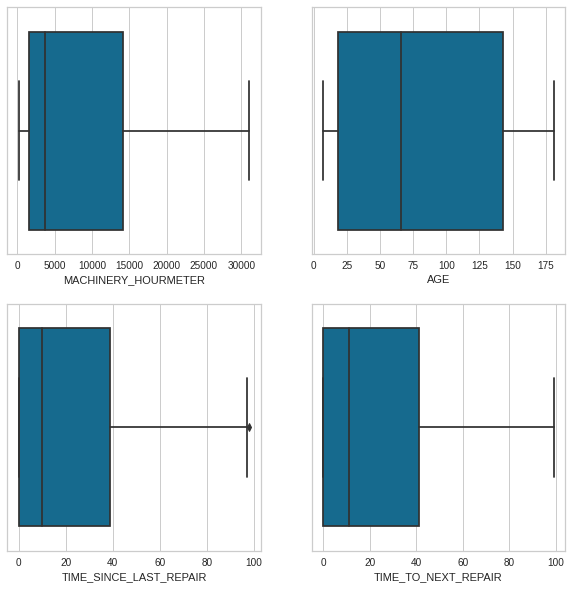

In [ ]:
#Checking the distributions in boxplot (AGAIN)
plt.figure(figsize=(10, 10))
col3 = ['MACHINERY_HOURMETER', 'AGE' , 'TIME_SINCE_LAST_REPAIR' , 'TIME_TO_NEXT_REPAIR']
for i,c in enumerate(col3):
  plt.subplot(2, 2, i+1)
  sns.boxplot(df_modeling_TH3[c])

We sucessfully remove the outliers

In [ ]:
#Filtering only maintenances that TIME_TO_NEXT_REPAIR is less than 100
df_modeling_TH3 = df_modeling_TH2.loc[df_modeling_TH['TIME_TO_NEXT_REPAIR'] > 0]

In [ ]:
#Filtering only maintenances that TIME_TO_NEXT_REPAIR is less than 100
df_modeling_TH4 = df_modeling_TH3.loc[df_modeling_TH['TIME_SINCE_LAST_REPAIR'] > 0]

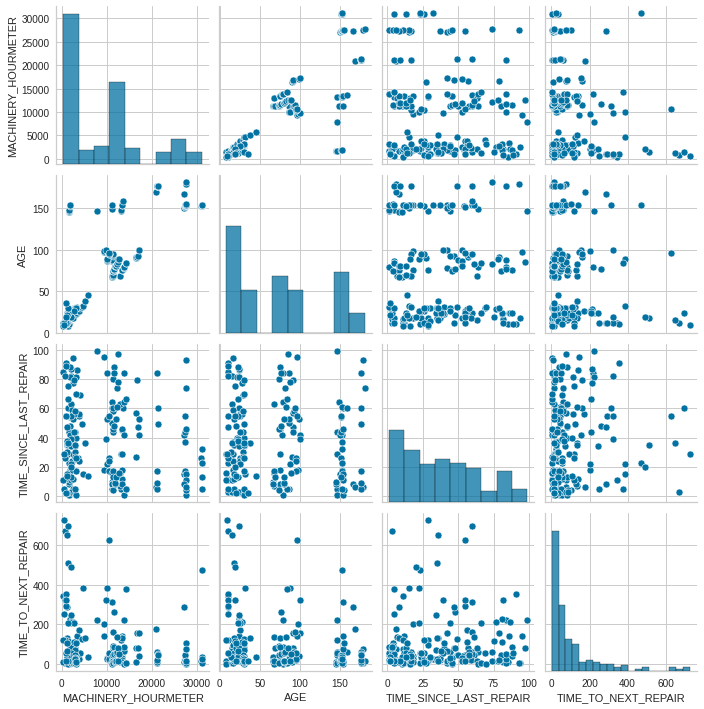

In [ ]:
#Checking possible correlations
sns.pairplot(df_modeling_TH4[col])

Text(0.5, 1.0, 'pearson correlation')

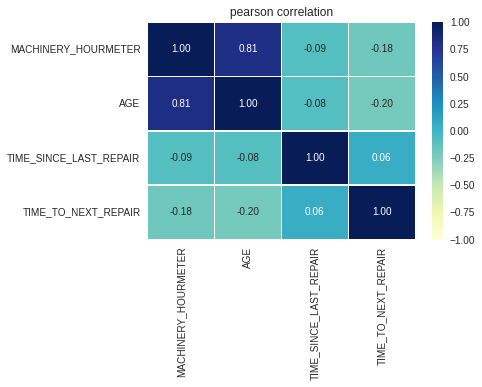

In [ ]:
#Correlation Matrix
corr_matrix = df_modeling_TH4[col].corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

As we can see there is a strong correlation between the MACHINERY_HOURMETER and the AGE of the machine, which makes sense, the older the machinery more hours it should have worked. The other variables have negative or near zero correlations and that is kind of expected because we didn't find a relationship between the age of the machine and how much time it takes to fail again, probably there is external events that have more correlation than just age.

Using PyCaret
PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code.

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.

In [ ]:
#Set up our dataset (preprocessing)
reg = setup(data = df_modeling_TH4, 
             target = 'TIME_TO_NEXT_REPAIR',
             ignore_features = ['MAINTENANCE_ID'],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,176
1,Target,TIME_TO_NEXT_REPAIR
2,Original Data,"(185, 8)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(129, 9)"


In [ ]:
#Comparing the results among all of available models in PyCaret
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,93.9887,16494.8613,121.1534,-0.4177,1.5516,7.2197,0.013
br,Bayesian Ridge,95.1029,16900.5690,122.4001,-0.4370,1.5614,7.2283,0.013
dummy,Dummy Regressor,96.0457,16707.3266,121.6365,-0.4389,1.5633,7.1628,0.010
lightgbm,Light Gradient Boosting Machine,82.6955,14800.6316,116.3533,-0.4437,1.4502,5.3460,0.019
omp,Orthogonal Matching Pursuit,95.4736,17496.2614,124.4872,-0.4714,1.5646,7.0773,0.011
par,Passive Aggressive Regressor,87.4148,19896.6626,129.5098,-0.4800,1.4826,3.8004,0.014
llar,Lasso Least Angle Regression,95.4908,17029.1077,123.2201,-0.4844,1.5598,7.1970,0.012
huber,Huber Regressor,86.5171,18431.8397,126.1532,-0.4980,1.4458,4.3348,0.019
ridge,Ridge Regression,94.1513,16594.0223,123.3316,-0.6458,1.5892,6.8902,0.011
lasso,Lasso Regression,95.0774,16946.7509,124.3605,-0.6531,1.5722,7.0302,0.013


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=176, selection='cyclic', tol=0.0001, warm_start=False)

The model that have the best MAE (93.9887) and RMSE (121.1534) is *Elastic Net*, altough it is pretty clear that the results are weak and any of the models tested can predict TIME_TO_NEXT_REPAIR in our train or test datasets. I will try to tune the parameters to see if I can get better results.

In [ ]:
#Creating the best model
model = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,69.6999,8771.0771,93.6540,-0.1407,1.4967,9.6970
1,71.2570,6325.7886,79.5348,-0.6623,1.8057,12.1376
2,67.7067,5170.6611,71.9073,-1.9364,1.5602,4.7076
3,65.8905,5369.5024,73.2769,-0.4044,1.4559,4.2783
4,91.0966,11538.5059,107.4174,-0.2404,1.8368,12.8528
5,116.2766,37348.9922,193.2589,-0.1221,1.0234,1.0587
6,126.5586,33783.9609,183.8041,0.0149,1.5895,5.6087
7,113.5934,19387.4453,139.2388,-0.5693,0.9352,0.8171
8,116.1462,24508.6367,156.5523,-0.1855,1.6374,4.9730
9,101.6618,12744.0430,112.8895,0.0689,2.1756,16.0663


> Before this analysis I never used elastic net before, so in a quick reserch online I could discover that it surged after some critisicm on lasso regression because in Lasso selection can be unstable because of its depedency on data. Elastic Net goal is to minimize loss function where α is the mixing parameter between ridge (α = 0) and lasso (α = 1). Follows below the equation:



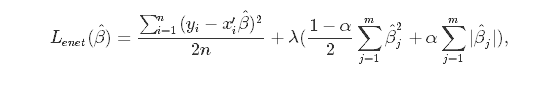


(source:Elastic Net Regression: A Complete Understanding (2021) | by ROHIT BHADAURIYA | Medium)

In [ ]:
#Tunning the best model
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,69.7248,8739.2891,93.4842,-0.1366,1.4951,9.6663
1,71.2857,6285.5601,79.2815,-0.6517,1.8051,12.1086
2,67.5337,5144.2256,71.7233,-1.9214,1.5599,4.7052
3,66.0577,5373.2793,73.3027,-0.4054,1.4565,4.2823
4,91.2406,11564.6191,107.5389,-0.2432,1.8376,12.8476
5,116.2626,37364.4570,193.2989,-0.1226,1.0231,1.0571
6,126.5788,33835.9766,183.9456,0.0134,1.5909,5.6461
7,113.6692,19411.3398,139.3246,-0.5713,0.9344,0.8181
8,115.8971,24399.0762,156.2020,-0.1802,1.6346,4.9784
9,101.6273,12756.3086,112.9438,0.0680,2.1754,16.0473


After the tunning the results are still weak. Let's change increasing the number of iterations.

In [ ]:
#Increasing the number of iterations
tuned_model = tune_model(model, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,71.0419,9904.1025,99.5194,-0.2881,1.2632,1.9058
1,42.5281,3124.4033,55.8964,0.1790,1.4324,7.3897
2,44.9152,2998.7048,54.7604,-0.7029,1.3134,2.9909
3,49.3131,3596.2908,59.9691,0.0594,1.1628,2.4538
4,68.1156,9545.5117,97.7011,-0.0261,1.6344,7.1092
5,120.5554,48341.4219,219.8668,-0.4524,1.3816,0.6673
6,121.8965,40734.0703,201.8268,-0.1877,1.5908,3.4635
7,146.3325,32399.7891,179.9994,-1.6226,1.5442,0.8256
8,103.9030,31209.0273,176.6608,-0.5096,1.4523,2.5940
9,76.9958,12383.3135,111.2803,0.0953,1.6031,7.4524


Still a small difference. Lets change the optimizer

In [ ]:
#Changing the optimizer to MAE
tuned_dt = tune_model(model, optimize = 'MAE') #default is 'R2'

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,68.3777,8457.3018,91.9636,-0.0999,1.3514,4.5834
1,56.6313,4524.2256,67.2624,-0.1889,1.6692,10.9892
2,62.1155,5039.4761,70.9893,-1.8619,1.5150,4.3842
3,57.0307,4194.0723,64.7617,-0.0970,1.3470,3.4190
4,82.7716,10339.1738,101.6817,-0.1115,1.7594,9.8318
5,111.9323,42835.6172,206.9677,-0.2869,1.1023,0.8036
6,123.1363,36153.2695,190.1401,-0.0542,1.7445,4.9738
7,132.5844,27728.4082,166.5185,-1.2445,1.2633,0.7946
8,107.0167,29558.2168,171.9250,-0.4298,1.5036,3.1774
9,88.2953,11499.3975,107.2352,0.1599,1.9206,12.2107


Optimizing the MAE gave us a 88.9892 result that is better than 93 from the beginning, but it is far from good.

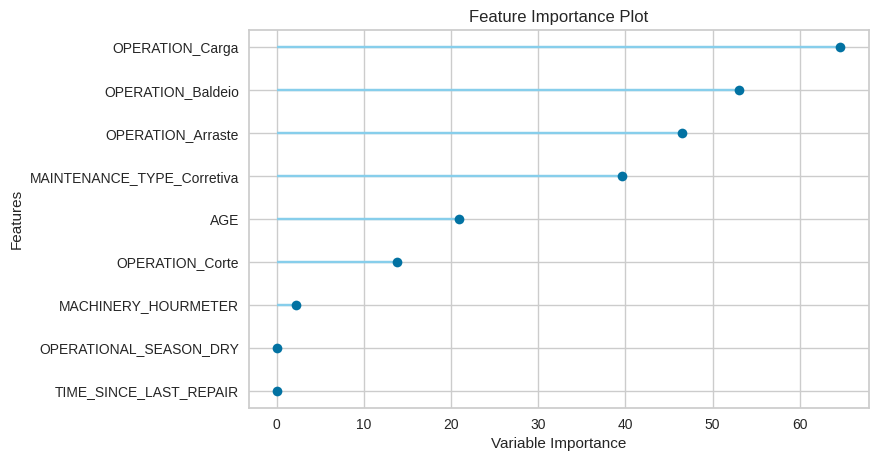

In [ ]:
#Checking the Feature Importance
plot_model(tuned_dt, plot='feature')

It seems that the type of operation performed in the field is very important in the model, followed by the MAINTENANCE_TYPE.

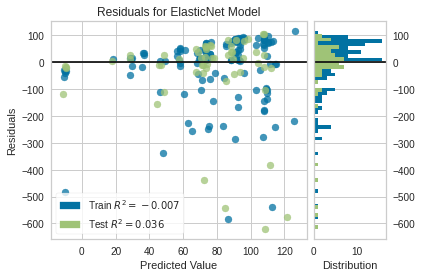

In [ ]:
#Checking the Residuals Plot
plot_model(tuned_dt, plot='residuals')

It's possible to see that we have many points that are apart from the regression line. It indicates that our model don't fit well the data and that confirms our assumption that regression models are not indicated to predict TIME_TO_NEXT_FAILURE in our dataset.

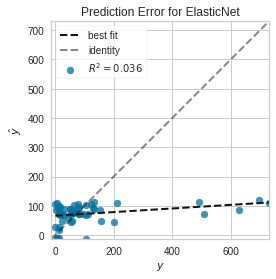

In [ ]:
plot_model(tuned_dt, plot='error')

Same Result as before...

#Conclusions
- The dataset is good and very interesting to work with;
- Baldeio operation is more than half maintenance records in the dataset. This is more than double the second operation which is Arraste;
- The average time to repair is 43.96 hours. That happened because some maintenances were longer than average. In fact if we look to August'2020 the average time was near 300 hours. Probabily this was a complex maintenance;
- The dataset had huge problems in the *MACHINERY_HOURMETER* field, we had to get in touch with business to understand and fix all the issues we had, that took time and its a sign of untrust the data that is presented, because if we have this much error in one field, what we can say about the others? Anyway, after we have fixed the problems e got way better results and now our Mean Time Between Repairs is hours is around 19 hours, which makes more sense. We also can see that Corte Machinery happens to need maintenance faster than the other groups;
- From the results we can see that 68.4% of total maintenances are Corretiva and 29.6% are Preventiva. Where Corretiva means maintenances that were performed after machine failure and Preventiva before machine failure;
- TERMINAL HIDRAULICO and MANGUEIRA HIDRAULICA are the ones that are most frequently used in maintenances (Almost 40% of total combined), since there are many other parts in the dataset we could consider only this 2 parts in the future modeling;
- More than 65% of the maintenances in the dataset were performed in the WET season, this result can be somehow biased because we saw previously that in the DRY season of 2020 we had the pandemic were most part of operations were shutted down. Anyway this can be used in the future model as well;
- Since the results are pretty much the same as TIME_SINCE_LAST_REPAIR but in difference row position, the graphs and results don't change. But now we have our dependent variable to the upcoming model;
- The Overall age of the machinery is 65 months, which means most part of the machinery are in the end of their life cycle. But we can see differences between operations, Arraste has the newest machines while Carga the oldest. So we better use age as a feature in our upcoming model;
- We Focused on PART_TYPE == TERMINAL HIDRAULICO which is the part with more records in the dataset (near 20%), and it is pretty much likely to be combined with MANGUEIRA HIDRÁULICA in each maintenance, and both combined are near 40% of the dataset. So we will focus on modeling the the Time to Next Repair to only the more frequent PART_TYPE in the dataset;
- The metrics we used to evaluate the models were Mean Absolute ERROR (MAE);
Root Mean Squared Error (RMSE);
- There is a strong correlation between the MACHINERY_HOURMETER and the AGE of the machine, which makes sense, the older the machinery more hours it should have worked. The other variables have negative or near zero correlations and that is kind of expected because we didn't find a relationship between the age of the machine and how much time it takes to fail again, probabily there is external events that have more correlation than just age.
- The model that have the best MAE (92.75) and RMSE (150.65) is Huber Regressor, altough it is pretty clear that the results are weak and any of the models tested can predict TIME_TO_NEXT_REPAIR in our train or test datasets. I will try to tune the parameters to see if I can get better results;
- Optimizing the MAE gave us a 89.77 result that is better than 92 from the beggining, but it is far from good;
- It seems that the type of the OPERATION the machines performs in the field is very important in the model, followed by the AGE of the machine. The DRY season has a relevant impact in the model as well;
- **There are many points that are apart from the regression line. It indicates that our model don't fit well the data and that confirms our assumption that regression models are not indicated to predict TIME_TO_NEXT_FAILURE in our dataset.**



#Recommendations
- The business should increase their data governance in order to get better data that can be used to model and predict results, nowadays the data is not good enough to be easily modeled;
- Doing more feature engineering to understand better the deviations;
- Business can try to isolate OPERATIONS or even MACHINES and model in that level of granulatiry, maybe they can find better results;
- It is possible that other methods like neural networks could achieve better results, so maybe they worth the shot trying;


#References
https://towardsdatascience.com/write-and-train-your-own-custom-machine-learning-models-using-pycaret-8fa76237374e <br>
https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea <br>
https://towardsdatascience.com/regression-with-pycaret-a-better-machine-learning-library-e02762a0615c <br>
https://pycaret.org <br>
https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70 <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html